In [24]:
import pandas as pd
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from landaupy import landau
from scipy.optimize import curve_fit

import analysis_data

### build an list to store run information

In [25]:
run_info =[]
runlist = 'runlist/LED_20240821_20240826_h5py_runlist'
runs = analysis_data.load_runlist_to_numpy(runlist)
print(runs)
len(runs)

['outnpy/LV2415_anodereadout_LV2414_dualreadout_20240821_LED_1.7V_11ns_400_ratio_run0.h5py'
 'outnpy/LV2415_anodereadout_LV2414_dualreadout_20240821_LED_1.7V_12ns_400_ratio_run0.h5py'
 'outnpy/LV2415_anodereadout_LV2414_dualreadout_20240821_LED_1.7V_13ns_400_ratio_run0.h5py'
 'outnpy/LV2415_anodereadout_LV2414_dualreadout_20240821_LED_1.7V_14ns_400_ratio_run0.h5py'
 'outnpy/LV2415_anodereadout_LV2414_dualreadout_20240821_LED_1.7V_15ns_400_ratio_run0.h5py'
 'outnpy/LV2415_anodereadout_LV2414_dualreadout_20240826_LED_1.7V_15.5ns_400_ratio_run0.h5py'
 'outnpy/LV2415_anodereadout_LV2414_dualreadout_20240826_LED_1.7V_16ns_400_ratio_run0.h5py'
 'outnpy/LV2415_anodereadout_LV2414_dualreadout_20240826_LED_1.7V_16.5ns_400_ratio_run0.h5py'
 'outnpy/LV2415_anodereadout_LV2414_dualreadout_20240826_LED_1.7V_17ns_400_ratio_run0.h5py'
 'outnpy/LV2415_anodereadout_LV2414_dualreadout_20240826_LED_1.7V_15ns_400_ratio_run0.h5py'
 'outnpy/LV2415_anodereadout_LV2414_dualreadout_20240826_LED_1.7V_14.5ns_400

25

### load data and plots all figures
### store the run info to DataFrames

/tmp/ipykernel_38746/810711708.py:14: RuntimeWarning: divide by zero encountered in divide
  ratio = area_ch0/area_ch1


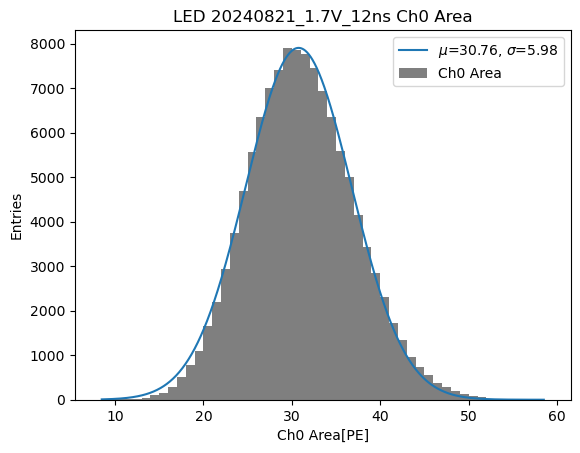

Ch0 Area Fit: mu= 30.76, sigma =5.98


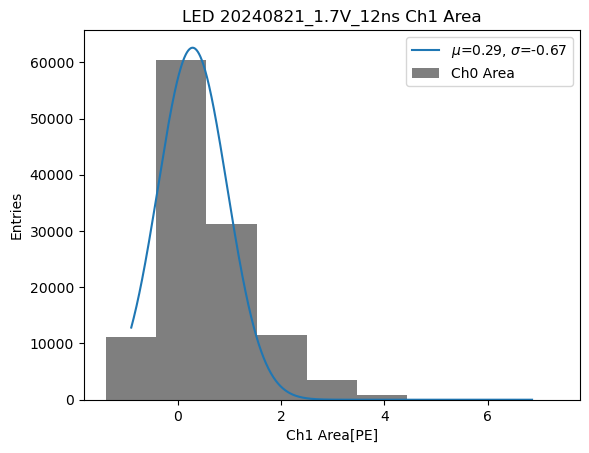

Ch1 Area Fit: mu= 0.29, sigma =-0.67


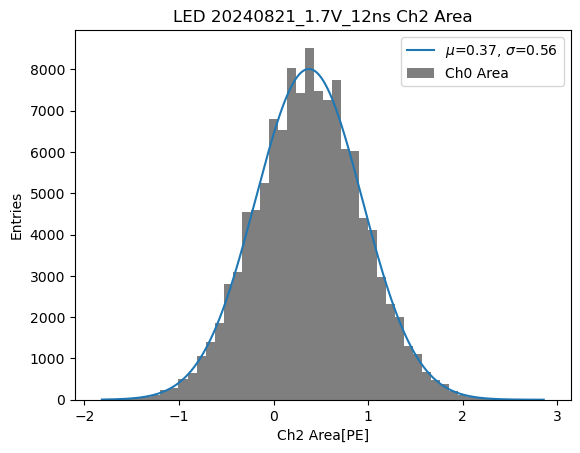

/tmp/ipykernel_38746/810711708.py:128: UserWarning: Legend does not support handles for QuadMesh instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Ch2 Area Fit: mu= 0.37, sigma =0.56


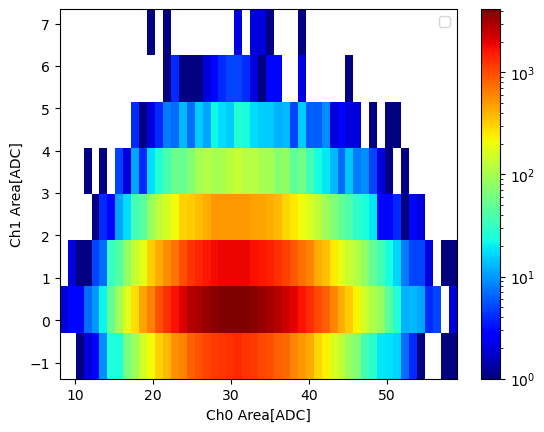

/tmp/ipykernel_38746/810711708.py:144: UserWarning: Legend does not support handles for QuadMesh instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


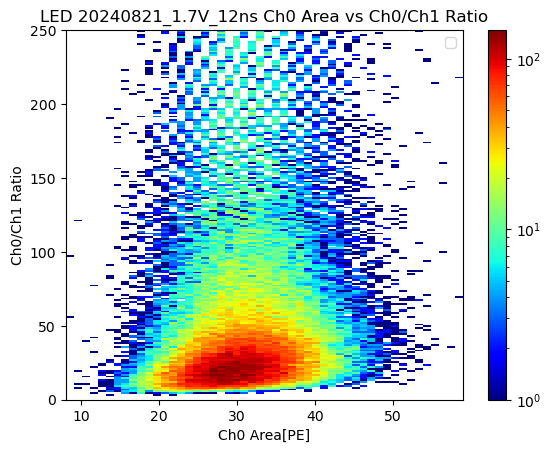

/tmp/ipykernel_38746/810711708.py:157: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_fit, y_fit, 'r-',color='black',  label=r'$\mu$={:.2f}, $\sigma$={:.2f}, A={:.2f}'.format(popt[0],popt[1],popt[2]))


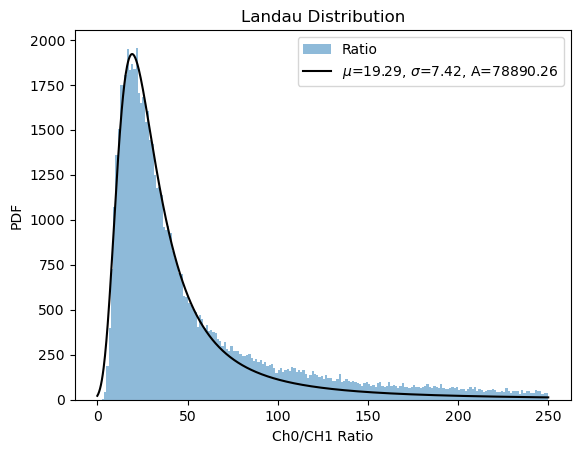

Ratio Fitting Result: mu= 19.29, sigma= 7.42


/tmp/ipykernel_38746/810711708.py:14: RuntimeWarning: divide by zero encountered in divide
  ratio = area_ch0/area_ch1


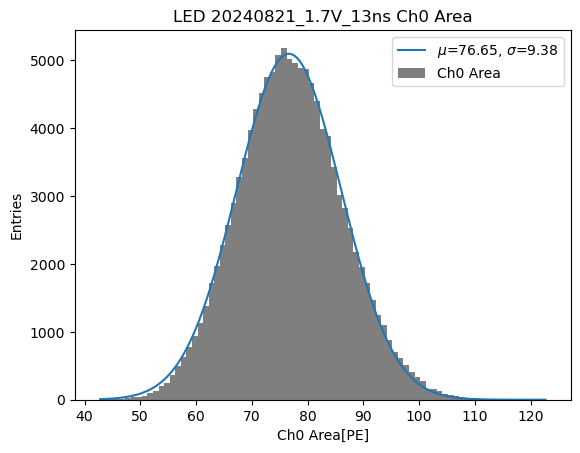

Ch0 Area Fit: mu= 76.65, sigma =9.38


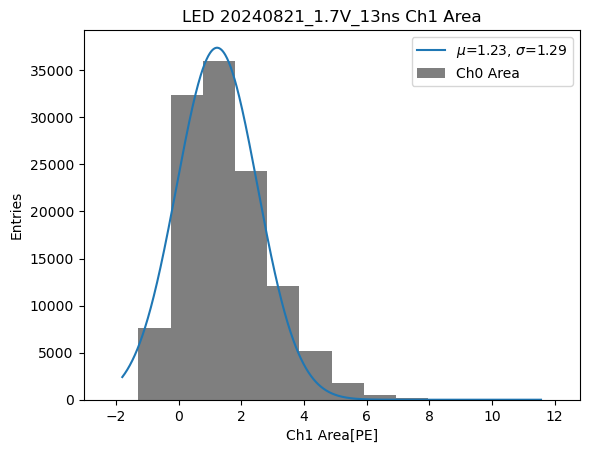

Ch1 Area Fit: mu= 1.23, sigma =1.29


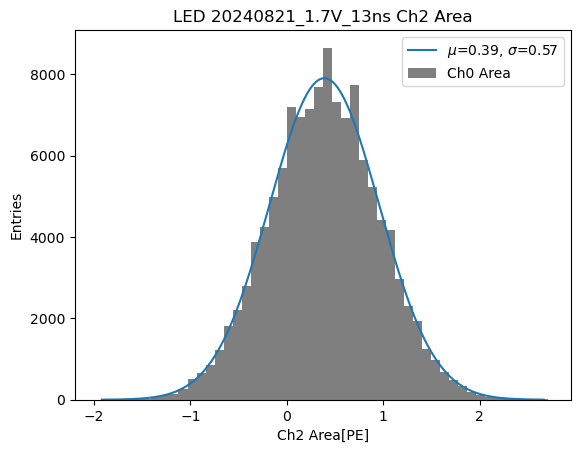

/tmp/ipykernel_38746/810711708.py:128: UserWarning: Legend does not support handles for QuadMesh instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Ch2 Area Fit: mu= 0.39, sigma =0.57


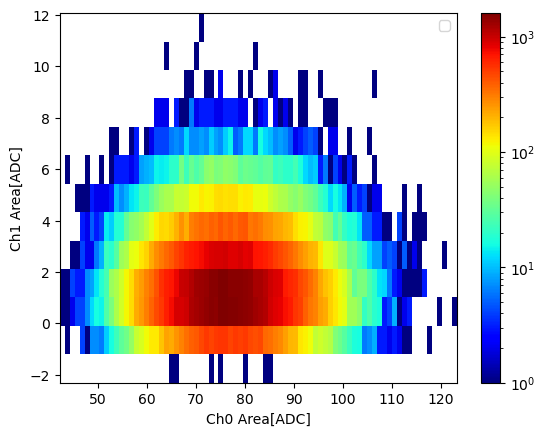

/tmp/ipykernel_38746/810711708.py:144: UserWarning: Legend does not support handles for QuadMesh instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


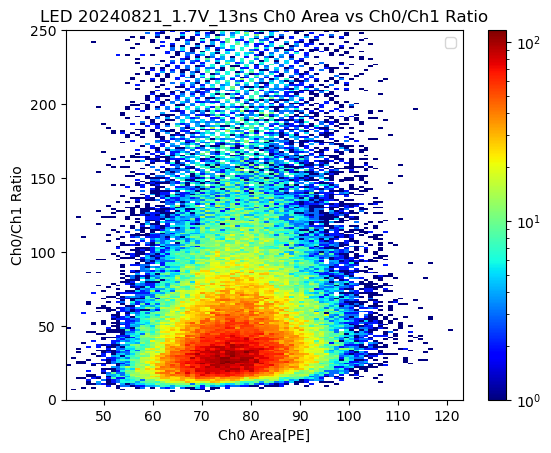

/tmp/ipykernel_38746/810711708.py:157: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_fit, y_fit, 'r-',color='black',  label=r'$\mu$={:.2f}, $\sigma$={:.2f}, A={:.2f}'.format(popt[0],popt[1],popt[2]))


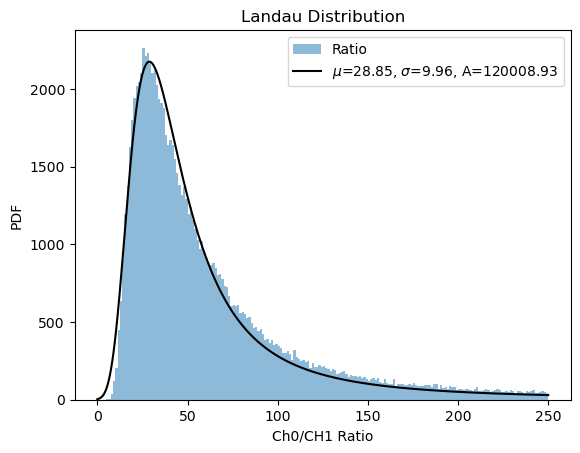

Ratio Fitting Result: mu= 28.85, sigma= 9.96


/tmp/ipykernel_38746/810711708.py:14: RuntimeWarning: divide by zero encountered in divide
  ratio = area_ch0/area_ch1


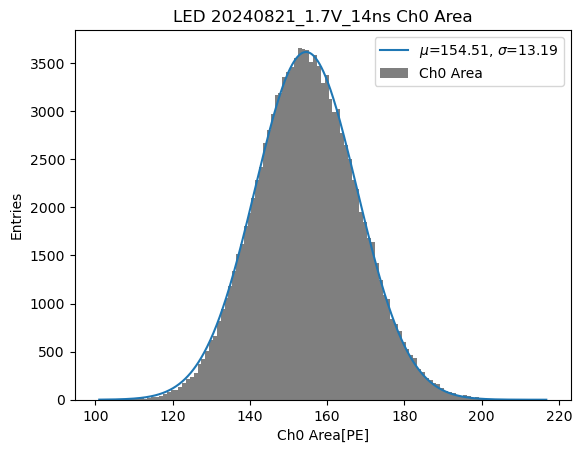

Ch0 Area Fit: mu= 154.51, sigma =13.19


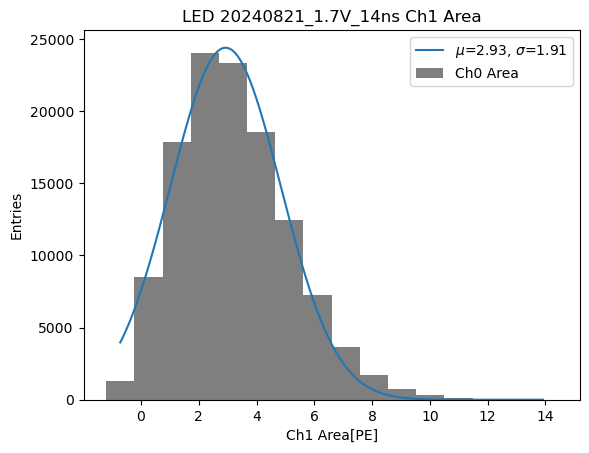

Ch1 Area Fit: mu= 2.93, sigma =1.91


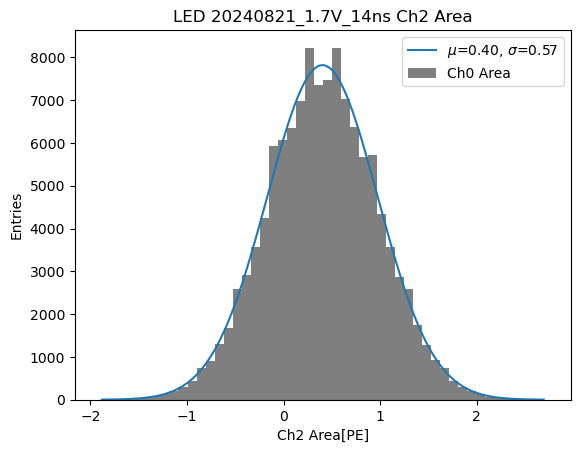

/tmp/ipykernel_38746/810711708.py:128: UserWarning: Legend does not support handles for QuadMesh instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Ch2 Area Fit: mu= 0.40, sigma =0.57


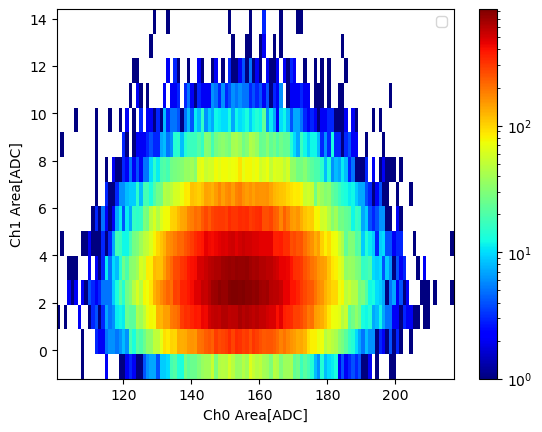

/tmp/ipykernel_38746/810711708.py:144: UserWarning: Legend does not support handles for QuadMesh instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


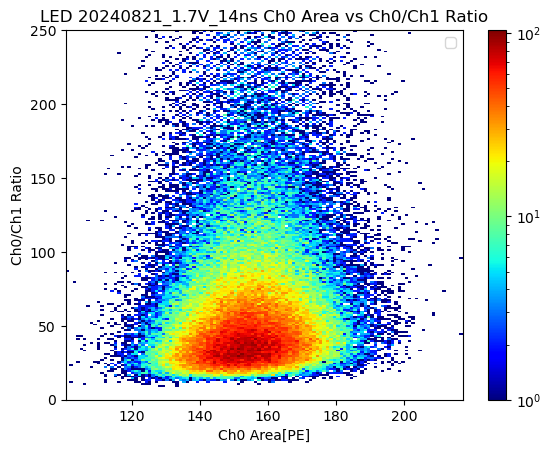

/tmp/ipykernel_38746/810711708.py:157: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_fit, y_fit, 'r-',color='black',  label=r'$\mu$={:.2f}, $\sigma$={:.2f}, A={:.2f}'.format(popt[0],popt[1],popt[2]))


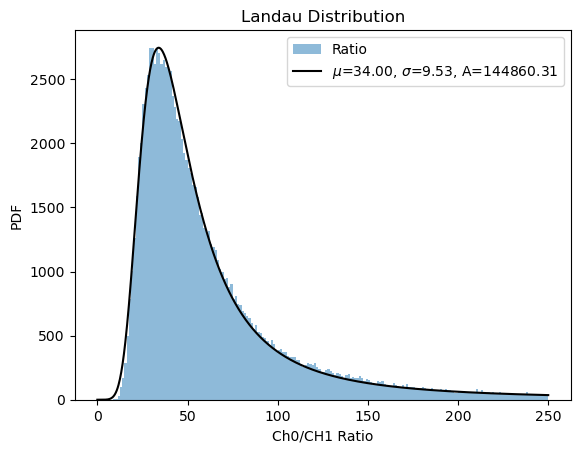

Ratio Fitting Result: mu= 34.00, sigma= 9.53


/tmp/ipykernel_38746/810711708.py:14: RuntimeWarning: divide by zero encountered in divide
  ratio = area_ch0/area_ch1


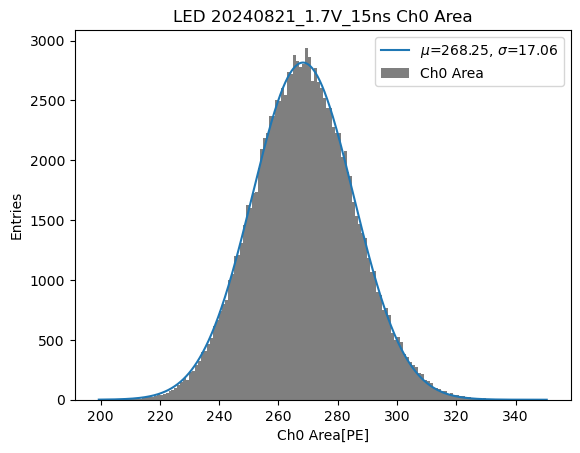

Ch0 Area Fit: mu= 268.25, sigma =17.06


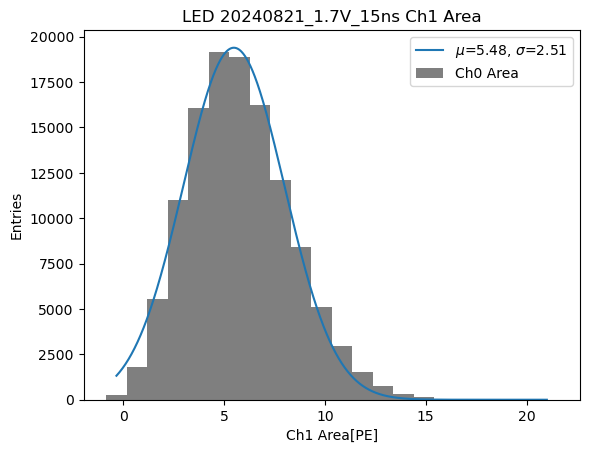

Ch1 Area Fit: mu= 5.48, sigma =2.51


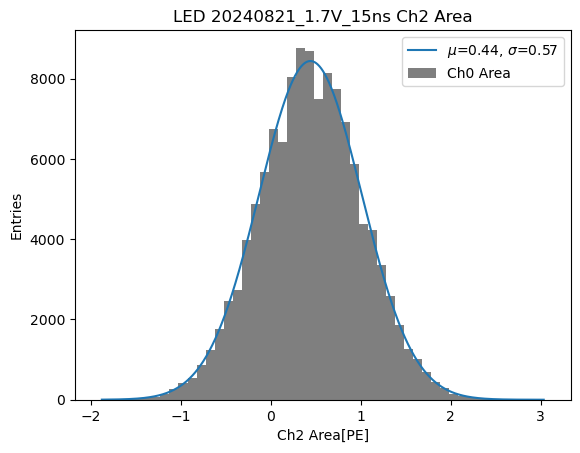

/tmp/ipykernel_38746/810711708.py:128: UserWarning: Legend does not support handles for QuadMesh instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Ch2 Area Fit: mu= 0.44, sigma =0.57


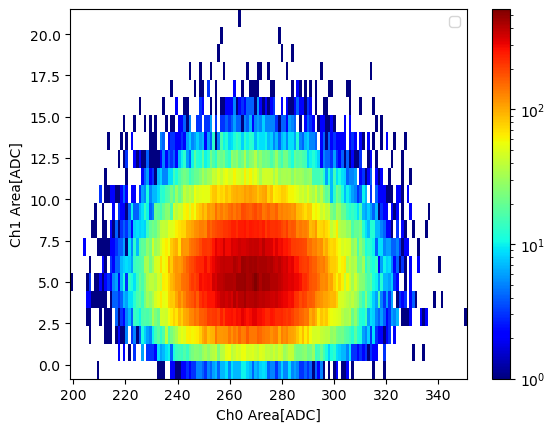

/tmp/ipykernel_38746/810711708.py:144: UserWarning: Legend does not support handles for QuadMesh instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


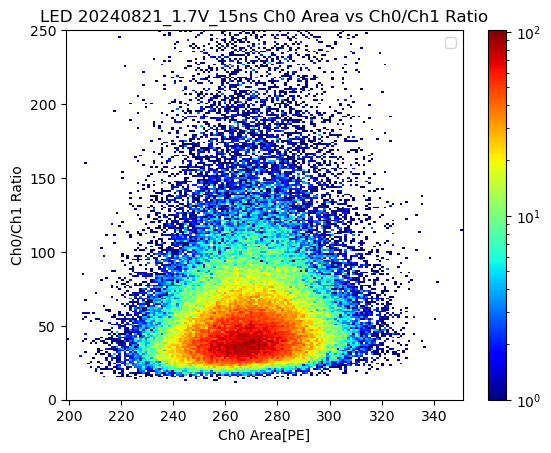

/tmp/ipykernel_38746/810711708.py:157: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_fit, y_fit, 'r-',color='black',  label=r'$\mu$={:.2f}, $\sigma$={:.2f}, A={:.2f}'.format(popt[0],popt[1],popt[2]))


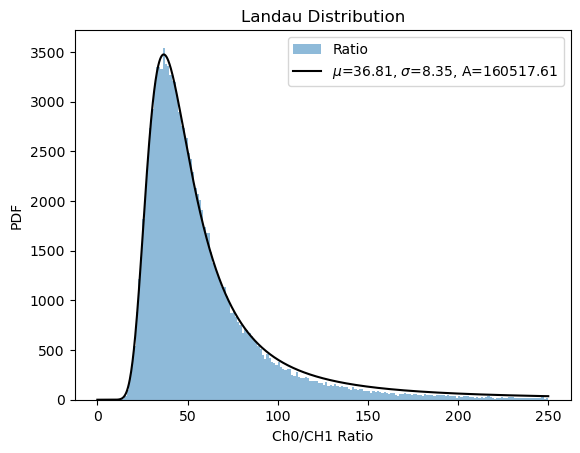

Ratio Fitting Result: mu= 36.81, sigma= 8.35


/tmp/ipykernel_38746/810711708.py:14: RuntimeWarning: divide by zero encountered in divide
  ratio = area_ch0/area_ch1


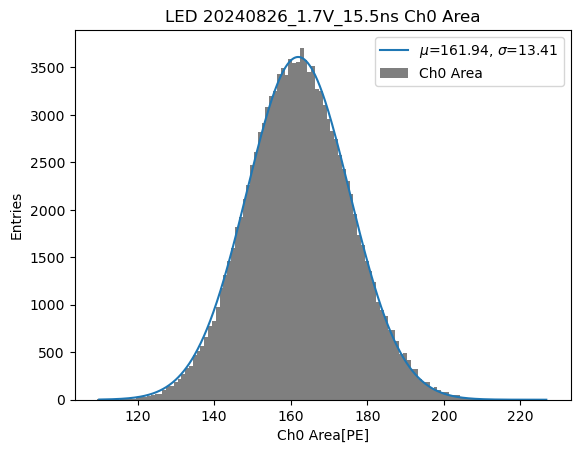

Ch0 Area Fit: mu= 161.94, sigma =13.41


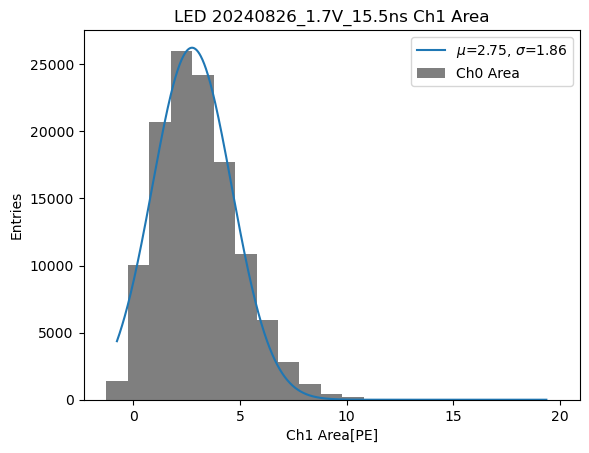

Ch1 Area Fit: mu= 2.75, sigma =1.86


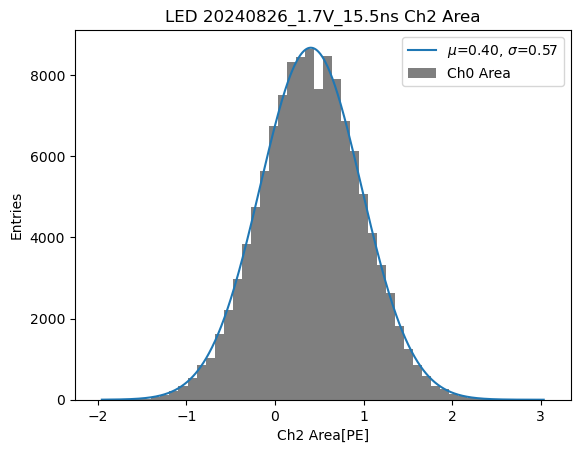

/tmp/ipykernel_38746/810711708.py:128: UserWarning: Legend does not support handles for QuadMesh instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Ch2 Area Fit: mu= 0.40, sigma =0.57


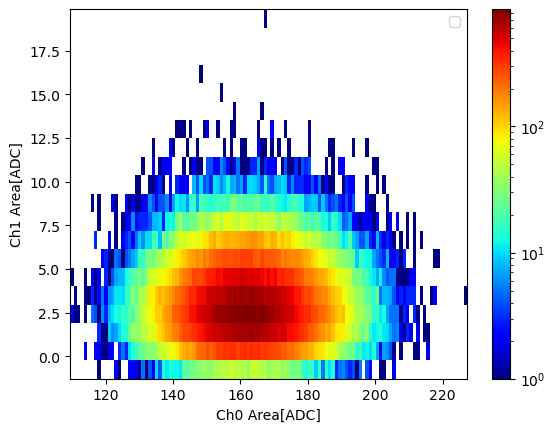

/tmp/ipykernel_38746/810711708.py:144: UserWarning: Legend does not support handles for QuadMesh instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


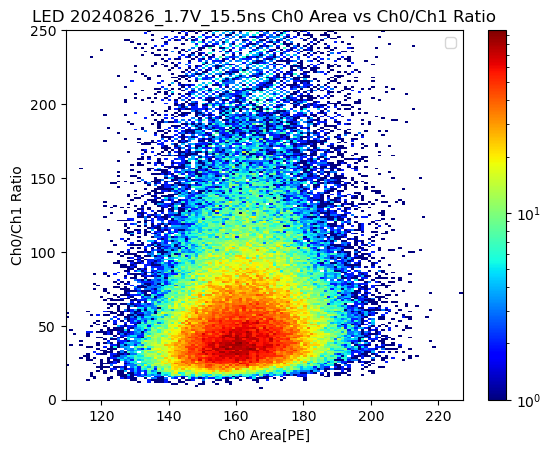

/tmp/ipykernel_38746/810711708.py:157: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_fit, y_fit, 'r-',color='black',  label=r'$\mu$={:.2f}, $\sigma$={:.2f}, A={:.2f}'.format(popt[0],popt[1],popt[2]))


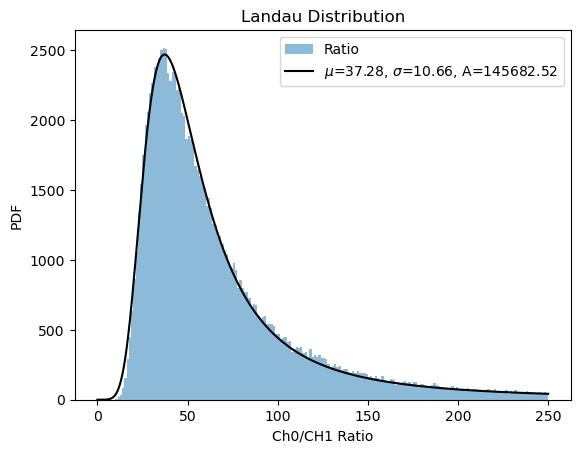

Ratio Fitting Result: mu= 37.28, sigma= 10.66


/tmp/ipykernel_38746/810711708.py:14: RuntimeWarning: divide by zero encountered in divide
  ratio = area_ch0/area_ch1


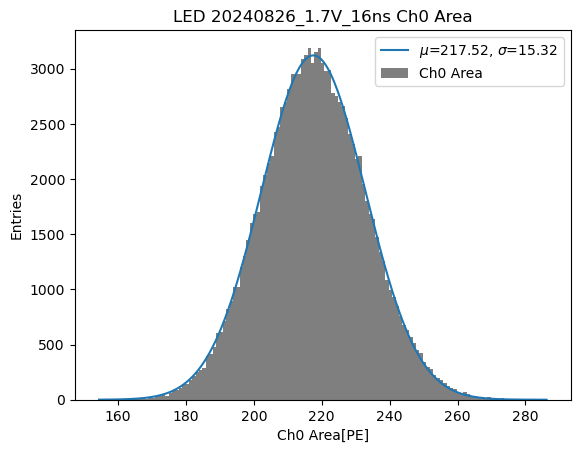

Ch0 Area Fit: mu= 217.52, sigma =15.32


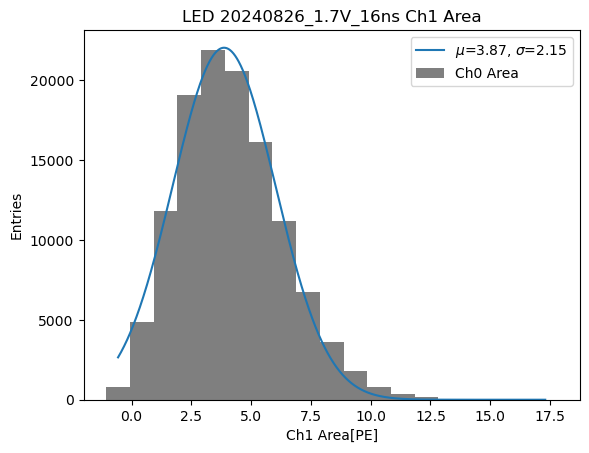

Ch1 Area Fit: mu= 3.87, sigma =2.15


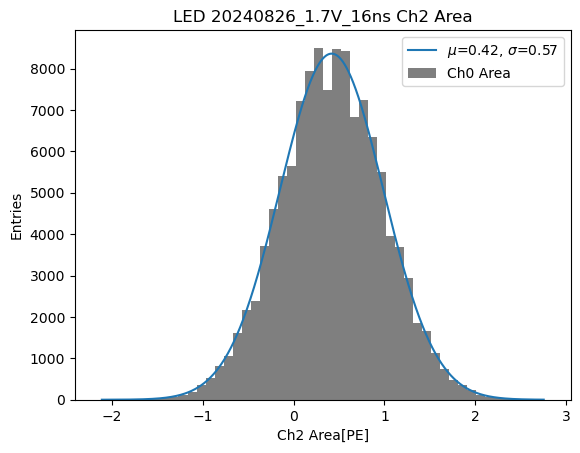

/tmp/ipykernel_38746/810711708.py:128: UserWarning: Legend does not support handles for QuadMesh instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Ch2 Area Fit: mu= 0.42, sigma =0.57


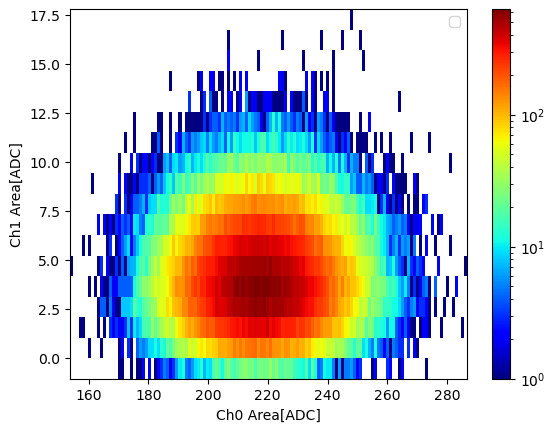

/tmp/ipykernel_38746/810711708.py:144: UserWarning: Legend does not support handles for QuadMesh instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


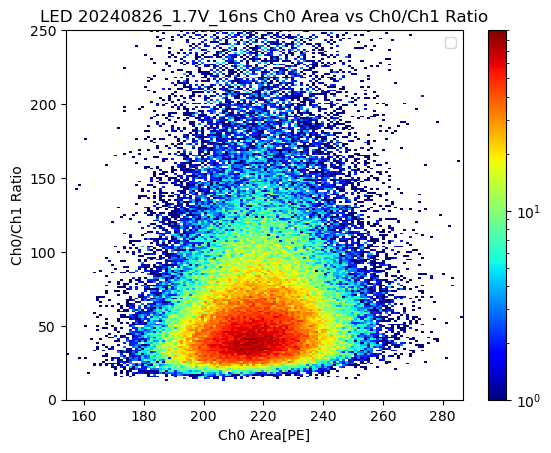

/tmp/ipykernel_38746/810711708.py:157: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_fit, y_fit, 'r-',color='black',  label=r'$\mu$={:.2f}, $\sigma$={:.2f}, A={:.2f}'.format(popt[0],popt[1],popt[2]))


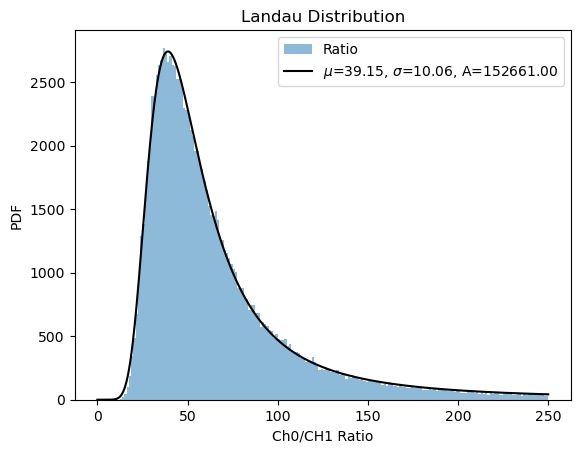

Ratio Fitting Result: mu= 39.15, sigma= 10.06


/tmp/ipykernel_38746/810711708.py:14: RuntimeWarning: divide by zero encountered in divide
  ratio = area_ch0/area_ch1


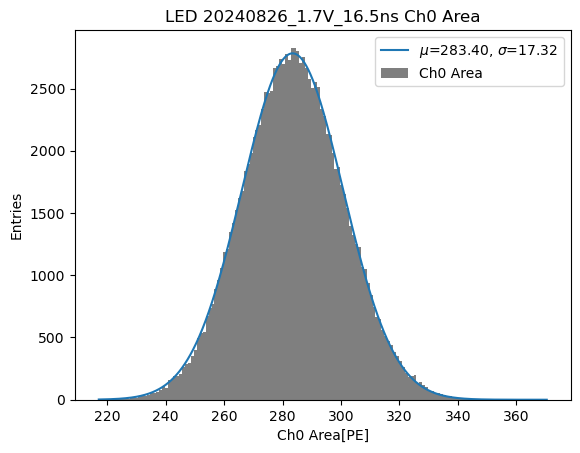

Ch0 Area Fit: mu= 283.40, sigma =17.32


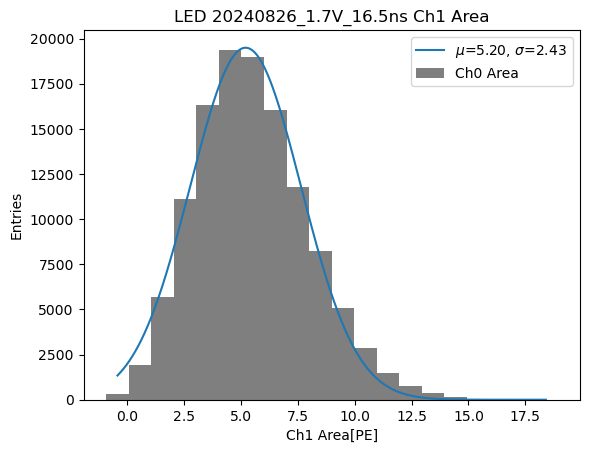

Ch1 Area Fit: mu= 5.20, sigma =2.43


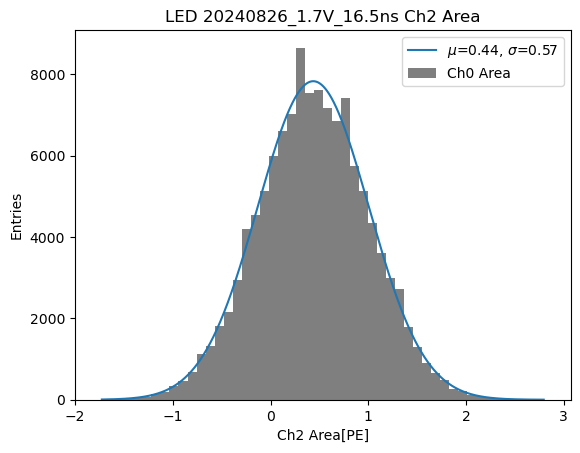

/tmp/ipykernel_38746/810711708.py:128: UserWarning: Legend does not support handles for QuadMesh instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Ch2 Area Fit: mu= 0.44, sigma =0.57


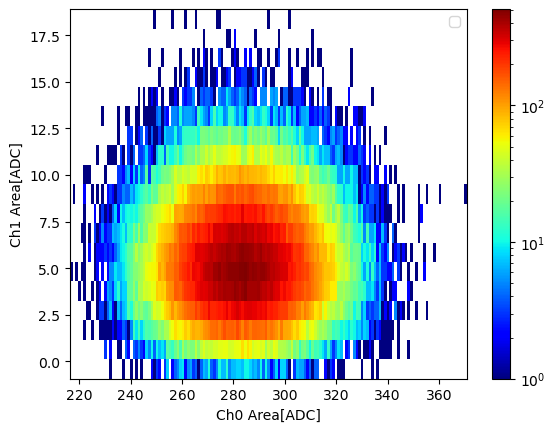

/tmp/ipykernel_38746/810711708.py:144: UserWarning: Legend does not support handles for QuadMesh instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [26]:
for file in runs:
    file_date = file.split('LED_')[0].split('readout_')[2]
    led_config = file.split('LED_')[1].split('_400')[0]
    file_tag = file_date + led_config
    #print(file_tag)
    if file_tag == '20240821_1.7V_11ns':
        continue
    df = pd.read_hdf(file, key='winfo')
    area_ch0 = df.Area[df.Ch==0].astype(np.float64).to_numpy()
    area_ch1 = df.Area_fixrange[df.Ch==1].astype(np.float64).to_numpy()
    area_ch2 = df.Area_fixrange[df.Ch==2].astype(np.float64).to_numpy()
   
    #df.head()
    ratio = area_ch0/area_ch1
    mean_ch0 = np.mean(area_ch0)
    std_ch0 = np.std(area_ch0)
    nbins_ch0 = np.round(np.max(area_ch0)-np.min(area_ch0)).astype(int)
    left_edge_ch0 = np.min(area_ch0)
    right_edge_ch0 = np.max(area_ch0)
    amplitude_ch0 = len(area_ch0)
    
    mean_ch1 = np.mean(area_ch1)
    std_ch1 = np.std(area_ch1)
    nbins_ch1 = np.round(np.max(area_ch1)-np.min(area_ch1)).astype(int)
    amplitude_ch1 = len(area_ch1)
    left_edge_ch1 = np.min(area_ch1)
    right_edge_ch1 = np.max(area_ch1)
    
    #ch2_area_pe = -area_ch2
    mean_ch2 = np.mean(- area_ch2)
    std_ch2 = np.std(- area_ch2)
    nbins_ch2 = 50 # np.round(np.max( -area_ch2) - np.min( -area_ch2) ).astype(int)
    left_edge_ch2 = np.min( - area_ch2)
    right_edge_ch2 = np.max(- area_ch2)
    amplitude_ch2 = len(- area_ch2)
    #if nbins_ch2 < 10:
    #    nbins_ch2 = 10*nbins_ch2
    
    #gain_ratio = area_ch0/(-area_ch2)
    
    #mean_gratio = np.mean(gain_ratio)
    #std_gratio = np.std(gain_ratio)
    #nbins_gratio = (np.round( np.abs( np.max(gain_ratio)-np.min(gain_ratio) ))).astype(int)
    
    #if nbins_gratio < 0:
    #    nbins_gratio = 100
        
    #left_edge_gratio = np.min(gain_ratio)
    #right_edge_gratio = np.max(gain_ratio)
    #amplitude_gratio = len(gain_ratio)
    
    if nbins_ch0 > 300:
        nbins_ch0 = 200
        left_edge_ch0 = mean_ch0 -100
        right_edge_ch0 = mean_ch0 + 100
    if nbins_ch1 > 200:
        nbins_ch1 = 200
        left_edge_ch1 = mean_ch1 -100
        right_edge_ch1 = mean_ch1 + 100
    
    hist, bins_edges = np.histogram(area_ch0, bins= nbins_ch0, range=(left_edge_ch0, right_edge_ch0))
    bins = (bins_edges[:-1] + bins_edges[1:])/2
    popt, pcov = curve_fit(analysis_data.gaussian, bins, hist, p0=[amplitude_ch0, mean_ch0,  std_ch0])
    x_fit = np.linspace(np.min(bins), np.max(bins), 1000)
    y_fit = analysis_data.gaussian(x_fit, *popt)
    plt.plot(x_fit, y_fit, label=r'$\mu$={:.2f}, $\sigma$={:.2f}'.format(popt[1], popt[2]))
    #plt.hist(area_ch0, bins=nbins_ch0, range=(left_edge_ch0, right_edge_ch0),  color='black', density=False, alpha=0.5, label='Ch0 Area')
    plt.hist(area_ch0, bins=nbins_ch0, range=(left_edge_ch0, right_edge_ch0),  color='black', density=False, alpha=0.5, label='Ch0 Area')
    plt.xlabel('Ch0 Area[PE]')
    plt.ylabel('Entries')
    plt.title(r'LED {} Ch0 Area'.format(file_tag))
    plt.legend()
    plt.savefig(r'./figs/LED_{}_Ch0_Area_fit_{:.2f}_PE_sigma_{:.2f}.png'.format(file_tag,popt[1], popt[2]),dpi=300)
    plt.show()
    plt.cla()
    print(r'Ch0 Area Fit: mu= {:.2f}, sigma ={:.2f}'.format(popt[1], popt[2]))
    Ch0_area_pe_mu = popt[1]
    Ch0_area_pe_sigma = popt[2]
    
    hist_, bins__edges_ = np.histogram(area_ch1, bins= nbins_ch1, range=(left_edge_ch1, right_edge_ch1))
    bins_ = (bins__edges_[:-1] + bins__edges_[1:])/2
    popt, pcov = curve_fit(analysis_data.gaussian, bins_, hist_, p0=[1.E3, mean_ch1,  std_ch1])
    x_fit = np.linspace(np.min(bins_), np.max(bins_), 1000)
    y_fit = analysis_data.gaussian(x_fit, *popt)
    plt.plot(x_fit, y_fit, label=r'$\mu$={:.2f}, $\sigma$={:.2f}'.format(popt[1], popt[2]))
    #plt.hist(area_ch0, bins=nbins_ch0, range=(left_edge_ch0, right_edge_ch0),  color='black', density=False, alpha=0.5, label='Ch0 Area')
    plt.hist(area_ch1, bins=nbins_ch1, range=(left_edge_ch1, right_edge_ch1),  color='black', density=False, alpha=0.5, label='Ch0 Area')
    plt.xlabel('Ch1 Area[PE]')
    plt.ylabel('Entries')
    plt.title(r'LED {} Ch1 Area'.format(file_tag))
    plt.legend()
    plt.savefig(r'./figs/LED_{}_Ch1_Area_fit_{:.2f}_PE_sigma_{:.2f}.png'.format(file_tag,popt[1], popt[2]),dpi=300)
    plt.show()
    plt.cla()
    print(r'Ch1 Area Fit: mu= {:.2f}, sigma ={:.2f}'.format(popt[1], popt[2]))
    Ch1_area_pe_mu = popt[1]
    Ch1_area_pe_sigma = popt[2]
    
    #hist, bins_edges = np.histogram(area_ch0, bins= nbins_ch0, range=(left_edge_ch0, right_edge_ch0))
    hist, bins_edges = np.histogram( -area_ch2, bins= nbins_ch2, range=(left_edge_ch2, right_edge_ch2))
    bins = (bins_edges[:-1] + bins_edges[1:])/2
    popt, pcov = curve_fit(analysis_data.gaussian, bins, hist, p0=[amplitude_ch2, mean_ch2,  std_ch2])
    x_fit = np.linspace(np.min(bins), np.max(bins), 1000)
    y_fit = analysis_data.gaussian(x_fit, *popt)
    plt.plot(x_fit, y_fit, label=r'$\mu$={:.2f}, $\sigma$={:.2f}'.format(popt[1], popt[2]))
    #plt.hist(area_ch0, bins=nbins_ch0, range=(left_edge_ch0, right_edge_ch0),  color='black', density=False, alpha=0.5, label='Ch0 Area')
    plt.hist( -area_ch2, bins=nbins_ch2, range=(left_edge_ch2, right_edge_ch2),  color='black', density=False, alpha=0.5, label='Ch0 Area')
    plt.xlabel('Ch2 Area[PE]')
    plt.ylabel('Entries')
    plt.title(r'LED {} Ch2 Area'.format(file_tag))
    plt.legend()
    plt.savefig(r'./res/LED_{}_Ch2_Area_fit_{:.2f}_PE_sigma_{:.2f}.png'.format(file_tag,popt[1], popt[2]),dpi=300)
    plt.show()
    plt.cla()
    print(r'Ch2 Area Fit: mu= {:.2f}, sigma ={:.2f}'.format(popt[1], popt[2]))
    Ch2_area_pe_mu = popt[1]
    Ch2_area_pe_sigma = popt[2]
    
    
    
    plt.hist2d(area_ch0, area_ch1, bins=[
        np.linspace(left_edge_ch0, right_edge_ch0, nbins_ch0),
        np.linspace(left_edge_ch1, right_edge_ch1, nbins_ch1)
    ] , norm=LogNorm(), cmap='jet', label='Ch1_vs_Ch0_area')
    plt.colorbar()
    plt.xlabel('Ch0 Area[ADC]')
    plt.ylabel('Ch1 Area[ADC]')
    plt.legend()
    plt.savefig(r'./figs/LED_{}_Ch0_{:.2f}_PE_Ch1_{:.2f}_PE.png'.format(file_tag, Ch0_area_pe_mu, Ch1_area_pe_mu),dpi=300)
    plt.show()
    plt.cla()
    

    
    plt.hist2d(area_ch0, ratio, bins=[
        np.linspace(left_edge_ch0,right_edge_ch0, nbins_ch0),
        np.linspace(0, 250, 200)
    ] , norm=LogNorm(), cmap='jet', label='Ch0_Ch1_ratio_vs_Ch0_area')
    plt.colorbar()
    #plt.yscale('log')
    plt.xlabel('Ch0 Area[PE]')
    plt.ylabel('Ch0/Ch1 Ratio')
    plt.title(r'LED {} Ch0 Area vs Ch0/Ch1 Ratio'.format(file_tag))
    plt.legend()
    plt.savefig(r'./figs/LED_{}_Ch0_Area_vs_Ch0_Ch1_Ratio.png'.format(file_tag),dpi=300)
    plt.show()
    plt.cla()
    
    hist, bins_edges =np.histogram(ratio, bins=200, range=(0, 250))
    bins = (bins_edges[:-1] + bins_edges[1:])/2
    popt, pcov = curve_fit(analysis_data.landau_fit, bins, hist , p0=[30, 10, 1.4e4])
    
    x_fit = np.linspace(0, 250, 1000)
    y_fit = analysis_data.landau_fit(x_fit, popt[0], popt[1],popt[2])
    #fig, ax = plt.subplots()
    plt.hist(ratio, bins=200, range=(0, 250), density=False, alpha=0.5, label='Ratio')
    plt.plot(x_fit, y_fit, 'r-',color='black',  label=r'$\mu$={:.2f}, $\sigma$={:.2f}, A={:.2f}'.format(popt[0],popt[1],popt[2]))
    plt.xlabel('Ch0/CH1 Ratio')
    plt.ylabel('PDF')
    plt.title('Landau Distribution')
    plt.legend()
    plt.savefig(r'./figs/LED_{}_Ch0_CH1_Ratio_fit_mu_{:.2f}_sigma_{:.2f}.png'.format(file_tag,popt[0],popt[1] ),dpi=300)
    plt.show()
    print(r'Ratio Fitting Result: mu= {:.2f}, sigma= {:.2f}'.format(popt[0],popt[1]))
    Ratio_fit_mu = popt[0]
    Ratio_fit_sigma = popt[1]
       
    run_info.append({
        'Ch0_Area_mu': Ch0_area_pe_mu,
        'Ch0_Area_sigma': Ch0_area_pe_sigma,
        'Ch1_Area_mu': Ch1_area_pe_mu,
        'Ch1_Area_sigma': Ch1_area_pe_sigma,
        'Ch2_Area_mu': Ch2_area_pe_mu,
        'Ch2_Area_sigma': Ch2_area_pe_sigma,
        'Ratio_fit_mu': Ratio_fit_mu,
        'Ratio_fit_sigma': Ratio_fit_sigma,
        #'Gain_ratio_fit_mu': gain_ratio_fit_mu,
        #'Gain_ratio_fit_sigma': gain_ratio_fit_sigma,
        'file_tag': file_tag            
    })

### store and save runifo to h5py file

In [79]:

import process_data
path_save = 'outnpy/LED_20240821_20240826_runinfo.h5py'
df = pd.DataFrame(run_info)
#process_data.write_to_hdf5(df, path_save)


In [80]:
df[:30]

,Ch0_Area_mu,Ch0_Area_sigma,Ch1_Area_mu,Ch1_Area_sigma,Ch2_Area_mu,Ch2_Area_sigma,Ratio_fit_mu,Ratio_fit_sigma,file_tag
0,30.761948,5.981835,0.289405,-0.666375,0.374080,0.563680,19.293423,7.419710,20240821_1.7V_12ns
1,76.651890,9.379817,1.226759,1.290521,0.387816,0.567724,28.849230,9.961529,20240821_1.7V_13ns
2,154.514332,13.193971,2.925236,1.911951,0.401903,0.572280,34.001170,9.530374,20240821_1.7V_14ns
3,268.252701,17.056904,5.478974,2.513433,0.440576,0.569511,36.810487,8.346693,20240821_1.7V_15ns
4,161.939651,13.410667,2.746755,1.859144,0.403472,0.570020,37.279698,10.661017,20240826_1.7V_15.5ns
5,217.516155,15.316344,3.867873,2.154331,0.419187,0.568027,39.148657,10.062109,20240826_1.7V_16ns
6,283.395672,17.321075,5.201054,2.434649,0.435664,0.568130,40.610510,9.408843,20240826_1.7V_16.5ns
7,359.403743,19.286333,6.780600,2.776512,0.458518,0.568870,41.364249,8.594679,20240826_1.7V_17ns
8,115.716241,11.430249,1.827423,1.572507,0.392291,0.569249,34.717195,10.860492,20240826_1.7V_15ns
9,79.235541,9.465390,1.086417,1.257238,0.381164,0.566744,31.225031,10.917881,20240826_1.7V_14.5ns


In [87]:
filter_0 = df.file_tag != '20240826_1.7V_17.5ns'
filter_1 = df.file_tag != '20240826_1.7V_18ns'
filter_2 = df.file_tag != '20240821_1.7V_15ns'
filter_3 = df.file_tag != '20240821_1.7V_14ns'
filter_4 = df.file_tag != '20240821_1.7V_13ns'
filter_5 = df.file_tag != '20240821_1.7V_12ns'
filter_6 = df.file_tag != '20240821_1.7V_11ns'
dfs = df[ filter_0  & filter_1 & filter_2 & filter_3 & filter_4  & filter_5 & filter_6]

In [88]:
len(dfs)

18

In [58]:
def exp_fit(x,A_0,A,x_0,alpha):
    return A_0 - (A * np.exp(-(x-x_0)/alpha))
popt, pcov = curve_fit(exp_fit,dfs.Ch0_Area_mu,dfs.Ratio_fit_mu,p0=(40,40,10,150))
fit_x = np.linspace(0,1000, 1000)
fit_y = exp_fit(fit_x,*popt)


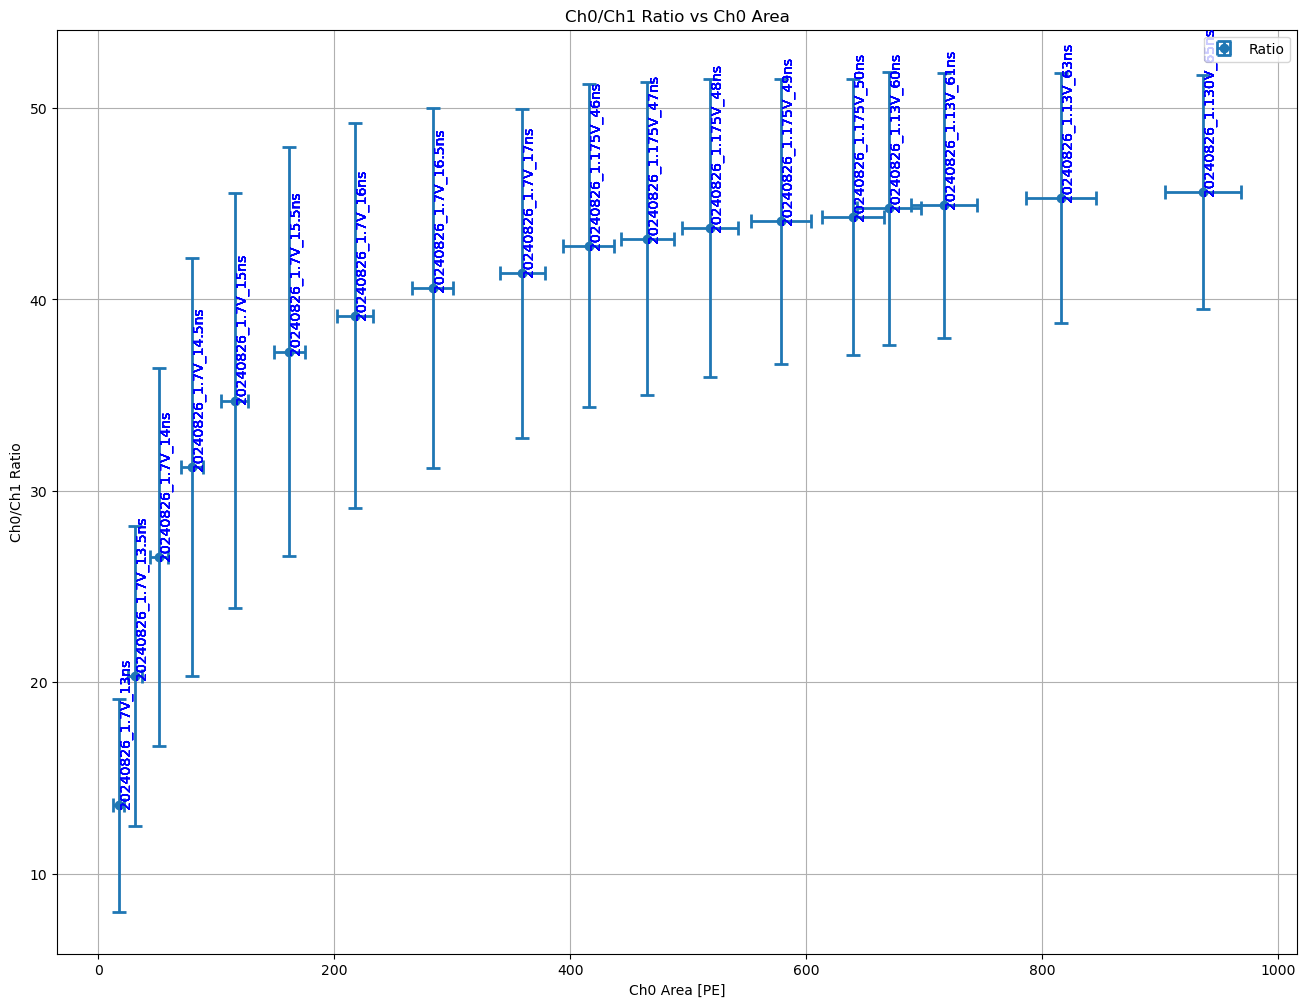

In [89]:
#fig, ax = plt.subplots(figsize=(12,8))
fig, ax = plt.subplots(figsize=(16,12))
ax.errorbar(dfs.Ch0_Area_mu, dfs.Ratio_fit_mu, xerr=dfs.Ch0_Area_sigma, yerr=dfs.Ratio_fit_sigma, fmt='o',  capsize=5, elinewidth=2, capthick=2, label='Ratio')
ax.set_xlabel('Ch0 Area [PE]')
ax.set_ylabel('Ch0/Ch1 Ratio')
ax.set_title('Ch0/Ch1 Ratio vs Ch0 Area')
#plt.plot(fit_x,fit_y,label='Fit')
for index, row in dfs.iterrows():
    for column_name, value in row.items(): 
        ax.text(dfs['Ch0_Area_mu'][index], dfs['Ratio_fit_mu'][index] , s= str(dfs['file_tag'][index]), rotation='vertical', color='blue')  #rotation='vertical'   rotation='horizontal'  
ax.legend()
ax.grid()
#plt.savefig(r'./figs/Ch0_CH1_Ratio_vs_Ch0_Area_combined_20240821_20240826_allruns.png',dpi=300)
plt.show()

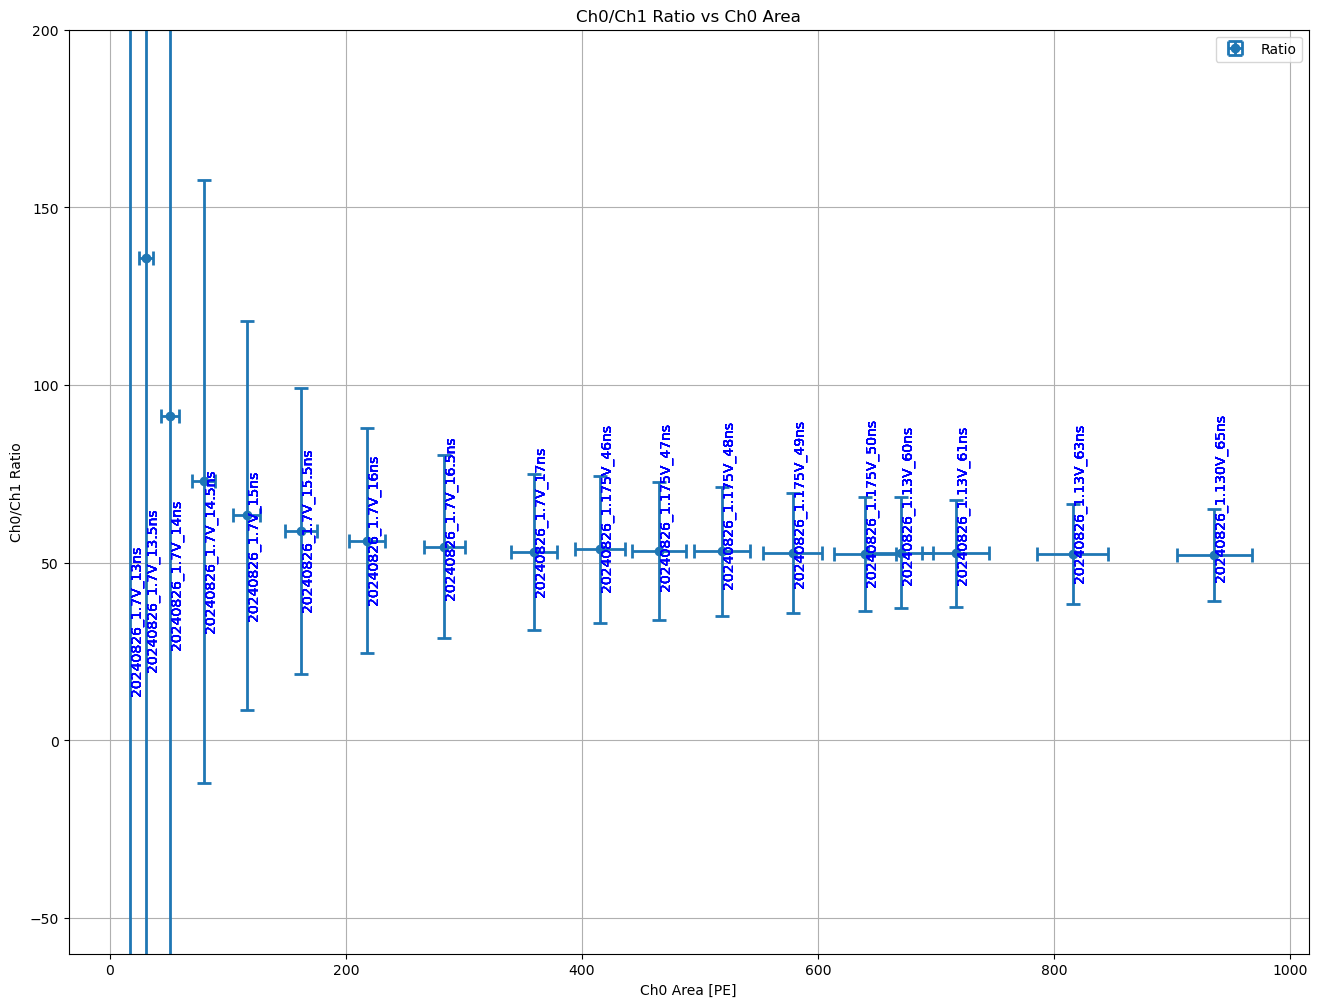

In [92]:
ratio = dfs.Ch0_Area_mu / dfs.Ch1_Area_mu 
ratio_err = ratio*np.sqrt((dfs.Ch0_Area_sigma/dfs.Ch0_Area_mu)**2 + (dfs.Ch1_Area_sigma/dfs.Ch1_Area_mu)**2)
gain_ratio = dfs.Ch0_Area_mu / dfs.Ch2_Area_mu
gain_ratio_err = gain_ratio*np.sqrt((dfs.Ch0_Area_sigma/dfs.Ch0_Area_mu)**2 + (dfs.Ch2_Area_sigma/dfs.Ch2_Area_mu)**2)

fig, ax = plt.subplots(figsize=(16,12))
ax.errorbar(dfs.Ch0_Area_mu, ratio, xerr=dfs.Ch0_Area_sigma, yerr=ratio_err, fmt='o',  capsize=5, elinewidth=2, capthick=2, label='Ratio')
ax.set_xlabel('Ch0 Area [PE]')
ax.set_ylabel('Ch0/Ch1 Ratio')
ax.set_title('Ch0/Ch1 Ratio vs Ch0 Area')
#plt.plot(fit_x,fit_y,label='Fit')
for index, row in dfs.iterrows():
    for column_name, value in row.items(): 
        ax.text(dfs['Ch0_Area_mu'][index], dfs['Ratio_fit_mu'][index] , s= str(dfs['file_tag'][index]), rotation='vertical', color='blue')  #rotation='vertical'   rotation='horizontal'  
ax.legend()
ax.grid()
ax.set_ylim(-60, 200)
#plt.savefig(r'./figs/Ch0_lv2414_CH1_lv2415_Ratio_vs_lv2414_anode_area_use_Gaussian_fit_combined_20240821_20240826_allruns.png',dpi=300)
plt.show()

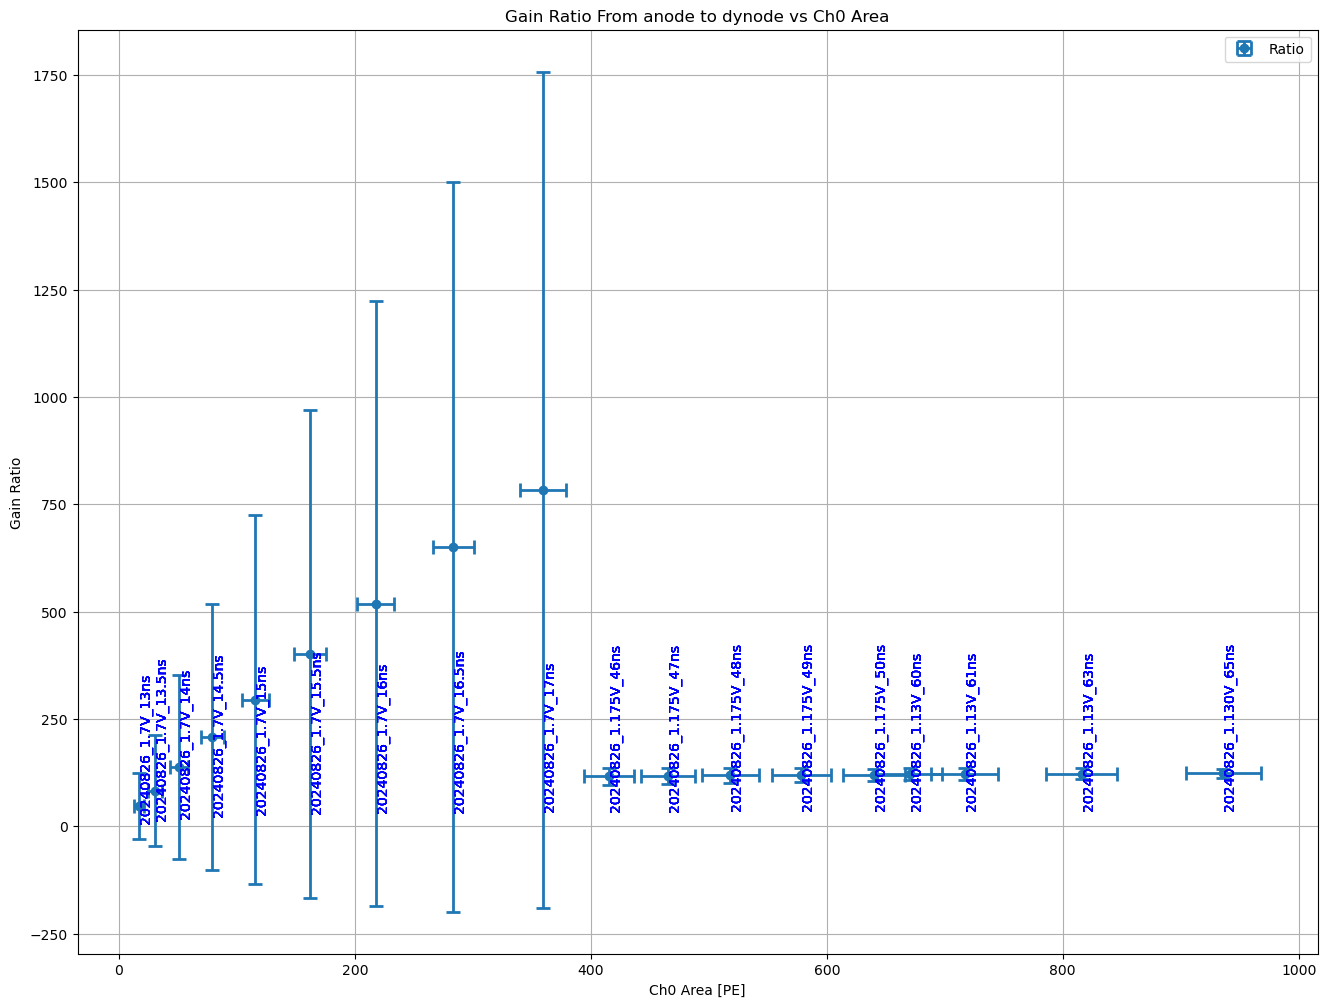

In [93]:
fig, ax = plt.subplots(figsize=(16,12))
ax.errorbar(dfs.Ch0_Area_mu, gain_ratio, xerr=dfs.Ch0_Area_sigma, yerr=gain_ratio_err, fmt='o',  capsize=5, elinewidth=2, capthick=2, label='Ratio')
ax.set_xlabel('Ch0 Area [PE]')
ax.set_ylabel('Gain Ratio')
ax.set_title('Gain Ratio From anode to dynode vs Ch0 Area')
for index, row in dfs.iterrows():
    for column_name, value in row.items(): 
        ax.text(dfs['Ch0_Area_mu'][index], dfs['Ratio_fit_mu'][index] , s= str(dfs['file_tag'][index]), rotation='vertical', color='blue')  #rotation='vertical'   rotation='horizontal'  
ax.legend()
ax.grid()
#ax.set_ylim(-60, 200)
#plt.savefig(r'./figs/LV2414_anode_to_dynode_gain_ratio_combined_20240821_20240826_allruns.png',dpi=300)
plt.show()

In [95]:
filter_area = df.Ch0_Area_mu > 400
filter_file = filter_0 & filter_1 & filter_2 & filter_3 & filter_4 & filter_5
df_larger_area = df[filter_area & filter_file]
#path = 'outnpy//df_larger_400pe_20240826.h5py'
#process_data.write_to_hdf5(df_larger_area, path)

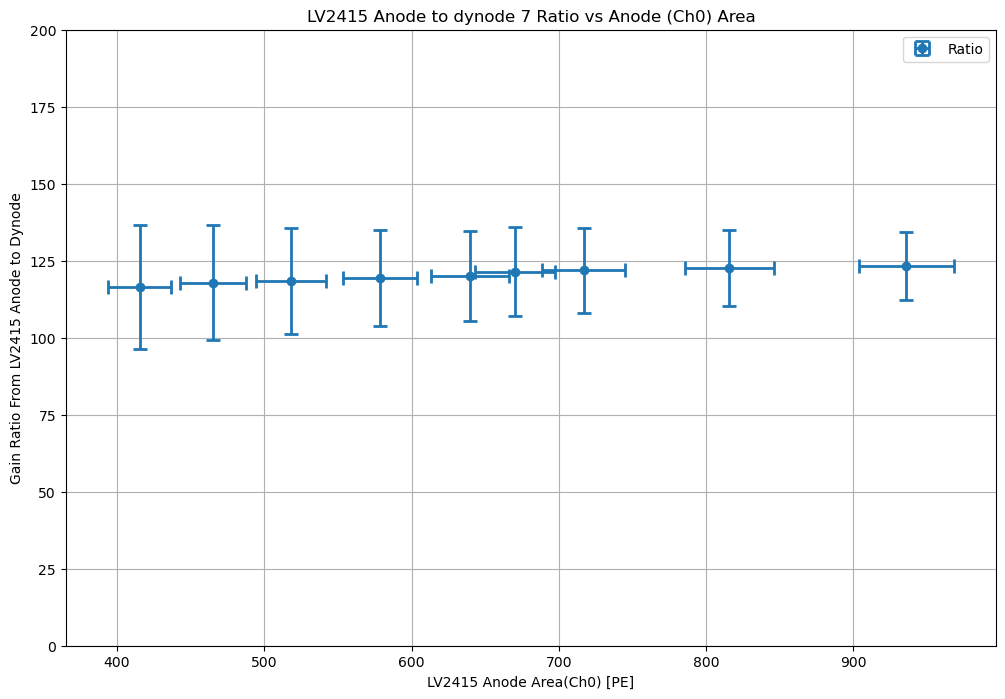

In [96]:
ratio = df_larger_area.Ch0_Area_mu / df_larger_area.Ch1_Area_mu 
ratio_err = ratio * np.sqrt((df_larger_area.Ch0_Area_sigma/df_larger_area.Ch0_Area_mu)**2 + (df_larger_area.Ch1_Area_sigma/df_larger_area.Ch1_Area_mu)**2)

gain_ratio = df_larger_area.Ch0_Area_mu / df_larger_area.Ch2_Area_mu
gain_ratio_err = gain_ratio * np.sqrt((df_larger_area.Ch0_Area_sigma/df_larger_area.Ch0_Area_mu)**2 + (df_larger_area.Ch2_Area_sigma/df_larger_area.Ch2_Area_mu)**2)

fig, ax = plt.subplots(figsize=(12,8))
ax.errorbar(df_larger_area.Ch0_Area_mu, gain_ratio, xerr=df_larger_area.Ch0_Area_sigma, yerr=gain_ratio_err, fmt='o',  capsize=5, elinewidth=2, capthick=2, label='Ratio')
ax.set_xlabel('LV2415 Anode Area(Ch0) [PE]')
ax.set_ylabel('Gain Ratio From LV2415 Anode to Dynode')
ax.set_title('LV2415 Anode to dynode 7 Ratio vs Anode (Ch0) Area')
#plt.plot(fit_x,fit_y,label='Fit')
#for index, row in dfs.iterrows():
#    for column_name, value in row.items(): 
#        ax.text(dfs['Ch0_Area_mu'][index], dfs['Ratio_fit_mu'][index] , s= str(dfs['file_tag'][index]), rotation='vertical', color='blue')  #rotation='vertical'   rotation='horizontal'  
ax.legend()
ax.grid()
ax.set_ylim(0, 200)
#plt.savefig(r'./figs/LV2414_Anode_to_Dynode_Gain_Ratio_vs_anode_Area_use_Gaussian_fit_combined_20240821_20240826_allruns.png',dpi=300)
plt.show()

In [2]:
import process_data
import pandas as pd
df_path = 'outnpy/df_larger_400pe_20240910.h5py'
df_larger_area_updated = pd.read_hdf(df_path, key='winfo')
tag_filter_0904_0= df_larger_area_updated.file_tag !='20240904_2.300V_900mv_10ns'
tag_filter_0904_1= df_larger_area_updated.file_tag !='20240904_2.300V_900mv_10ns_attenuator_18DB'
tag_filter_0904_2= df_larger_area_updated.file_tag !='20240904_2.300V_900mv_10ns_attenuator_9DB'
tag_filter_0904_3= df_larger_area_updated.file_tag !='20240904_2.300V_900mv_10ns_attenuator_12DB'
tag_filter_0904_4= df_larger_area_updated.file_tag !='20240903_2.265V_10ns'
df_larger_area_updated = df_larger_area_updated[tag_filter_0904_0 & tag_filter_0904_1 & tag_filter_0904_2 & tag_filter_0904_3 & tag_filter_0904_4]
df_larger_area_updated[:40]

,Ch0_Area_mu,Ch0_Area_sigma,Ch1_Area_mu,Ch1_Area_sigma,Ch2_Area_mu,Ch2_Area_sigma,Ratio_fit_mu,Ratio_fit_sigma,file_tag
15,639.751824,26.387253,12.168145,3.673991,5.327955,0.610262,44.309030,7.204908,20240826_1.175V_50ns
16,465.270956,22.647286,8.719894,3.142361,3.948746,0.593799,43.169596,8.175114,20240826_1.175V_47ns
17,518.328086,23.757927,9.743349,3.290989,4.374219,0.599934,43.735822,7.797634,20240826_1.175V_48ns
18,578.453969,25.096865,10.952348,3.465607,4.845701,0.601932,44.078925,7.445953,20240826_1.175V_49ns
19,415.389551,21.403529,7.723297,2.955618,3.565333,0.591837,42.802990,8.446684,20240826_1.175V_46ns
20,936.073090,32.051086,17.948452,4.422688,7.595008,0.633552,45.611415,6.129114,20240826_1.130V_65ns
21,670.115619,27.305052,12.673052,3.730500,5.518898,0.615852,44.758404,7.138338,20240826_1.13V_60ns
22,716.786888,28.276617,13.613741,3.878739,5.882961,0.619760,44.913556,6.927360,20240826_1.13V_61ns
23,815.889452,30.004269,15.542911,4.139791,6.652786,0.627430,45.309447,6.546371,20240826_1.13V_63ns
0,1110.197015,32.365201,30.758995,6.541893,0.845349,0.737684,36.093410,7.748208,20240829_1.075V_100ns


In [6]:
ratio = df_larger_area_updated.Ch0_Area_mu / df_larger_area_updated.Ch1_Area_mu 
ratio_err = ratio*np.sqrt((df_larger_area_updated.Ch0_Area_sigma/df_larger_area_updated.Ch0_Area_mu)**2 + (df_larger_area_updated.Ch1_Area_sigma/df_larger_area_updated.Ch1_Area_mu)**2)

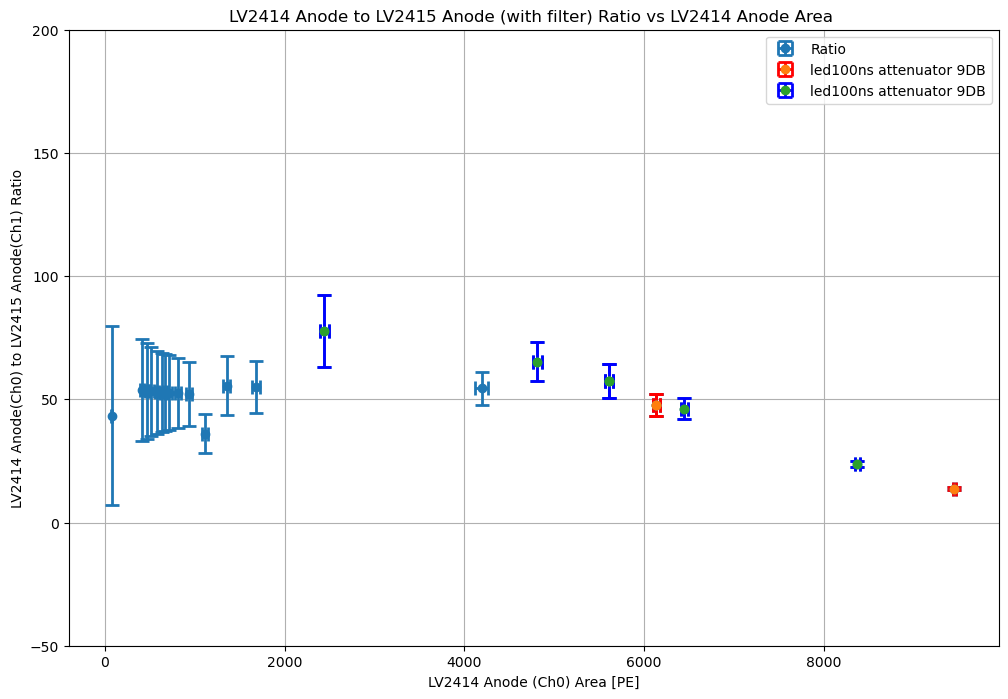

In [17]:
fig, ax = plt.subplots(figsize=(12,8))
ax.errorbar(df_larger_area_updated.Ch0_Area_mu, ratio, xerr=df_larger_area_updated.Ch0_Area_sigma, yerr=ratio_err, fmt='o',  capsize=5, elinewidth=2, capthick=2, label='Ratio')
ax.errorbar(df_larger_area_updated.Ch0_Area_mu[-9:-6], ratio[-9:-6], xerr=df_larger_area_updated.Ch0_Area_sigma[-9:-6], yerr=ratio_err[-9:-6], fmt='o', ecolor='red',  capsize=5, elinewidth=2, capthick=2, label='led100ns attenuator 9DB')
ax.errorbar(df_larger_area_updated.Ch0_Area_mu[-6:], ratio[-6:], xerr=df_larger_area_updated.Ch0_Area_sigma[-6:], yerr=ratio_err[-6:], fmt='o', ecolor='blue',  capsize=5, elinewidth=2, capthick=2, label='led100ns attenuator 9DB')
ax.set_xlabel('LV2414 Anode (Ch0) Area [PE]')
ax.set_ylabel('LV2414 Anode(Ch0) to LV2415 Anode(Ch1) Ratio')
ax.set_title('LV2414 Anode to LV2415 Anode (with filter) Ratio vs LV2414 Anode Area ')
#for index, row in df_larger_area_updated.iterrows():
#    for column_name, value in row.items(): 
#        ax.text(df_larger_area_updated['Ch0_Area_mu'][index], df_larger_area_updated['Ratio_fit_mu'][index] , s= str(df_larger_area_updated['file_tag'][index]), rotation='vertical', color='blue')  #rotation='vertical'   rotation='horizontal'  
ax.legend()
ax.grid()
ax.set_ylim(-50, 200)
#ax.set_xlim(0, 1000)
#plt.savefig(r'./figs/LV2414_anode_to_LV2415_anode_Ratio_use_Gaussian_fit_combined_20240821_20240826_20240829_allruns.png',dpi=300)
plt.show()

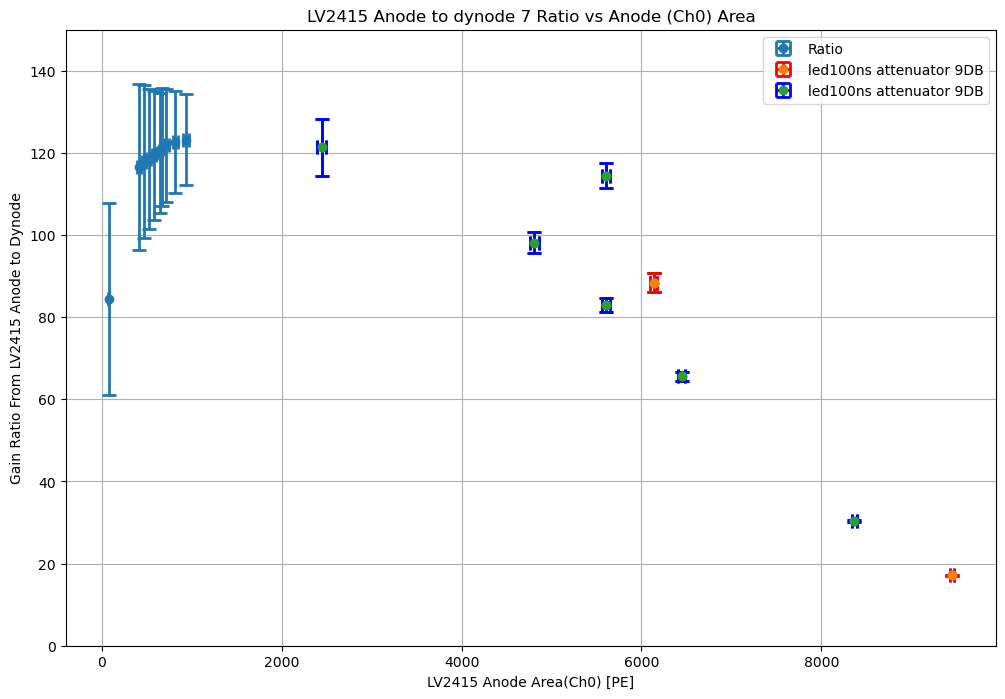

In [18]:
gain_ratio = df_larger_area_updated.Ch0_Area_mu / df_larger_area_updated.Ch2_Area_mu
gain_ratio_err = gain_ratio * np.sqrt((df_larger_area_updated.Ch0_Area_sigma/df_larger_area_updated.Ch0_Area_mu)**2 + (df_larger_area_updated.Ch2_Area_sigma/df_larger_area_updated.Ch2_Area_mu)**2)

fig, ax = plt.subplots(figsize=(12,8))
ax.errorbar(df_larger_area_updated.Ch0_Area_mu, gain_ratio, xerr=df_larger_area_updated.Ch0_Area_sigma, yerr=gain_ratio_err, fmt='o',  capsize=5, elinewidth=2, capthick=2, label='Ratio')
ax.errorbar(df_larger_area_updated.Ch0_Area_mu[-9:-6], gain_ratio[-9:-6], xerr=df_larger_area_updated.Ch0_Area_sigma[-9:-6], yerr=gain_ratio_err[-9:-6], fmt='o', ecolor='red',  capsize=5, elinewidth=2, capthick=2, label='led100ns attenuator 9DB')
ax.errorbar(df_larger_area_updated.Ch0_Area_mu[-6:], gain_ratio[-6:], xerr=df_larger_area_updated.Ch0_Area_sigma[-6:], yerr=gain_ratio_err[-6:], fmt='o', ecolor='blue',  capsize=5, elinewidth=2, capthick=2, label='led100ns attenuator 9DB')
ax.set_xlabel('LV2415 Anode Area(Ch0) [PE]')
ax.set_ylabel('Gain Ratio From LV2415 Anode to Dynode')
ax.set_title('LV2415 Anode to dynode 7 Ratio vs Anode (Ch0) Area')
#for index, row in df_larger_area_updated.iterrows():
#    for column_name, value in row.items(): 
#        ax.text(df_larger_area_updated['Ch0_Area_mu'][index], df_larger_area_updated['Ratio_fit_mu'][index] , s= str(df_larger_area_updated['file_tag'][index]), rotation='vertical', color='blue')  #rotation='vertical'   rotation='horizontal'  
ax.legend()
ax.grid()
ax.set_ylim(0, 150)
#ax.set_xlim(0, 1000)
#plt.savefig(r'./figs/LV2414_Anode_to_Dynode_Gain_Ratio_vs_anode_Area_use_Gaussian_fit_combined_20240821_20240826_allruns.png',dpi=300)
plt.show()

In [ ]:
np.mean(gain_ratio), np.std(gain_ratio), np.mean(gain_ratio_err), np.std(gain_ratio_err)

In [36]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
# from landaupy import landau
# from scipy.optimize import curve_fit

import analysis_data
import process_data
import pandas as pd
df_path = 'outnpy/df_100ns_900mv_20240924_backup.h5py'
df = pd.read_hdf(df_path, key='winfo')
df_path_0 = 'outnpy/df_100ns_900mv_9DB_20240904_20240920_tmp.h5py'
df0 = pd.read_hdf(df_path_0, key='winfo')

In [37]:
ratio = df.Ch0_Area_mu / df.Ch1_Area_mu 
ratio_err = ratio*np.sqrt((df.Ch0_Area_sigma/df.Ch0_Area_mu)**2 + (df.Ch1_Area_sigma/df.Ch1_Area_mu)**2)

ratio_0 = df0.Ch0_Area_mu / df0.Ch1_Area_mu 
ratio_err_0 = ratio_0*np.sqrt((df0.Ch0_Area_sigma/df0.Ch0_Area_mu)**2 + (df0.Ch1_Area_sigma/df0.Ch1_Area_mu)**2)

<function matplotlib.pyplot.show(close=None, block=None)>

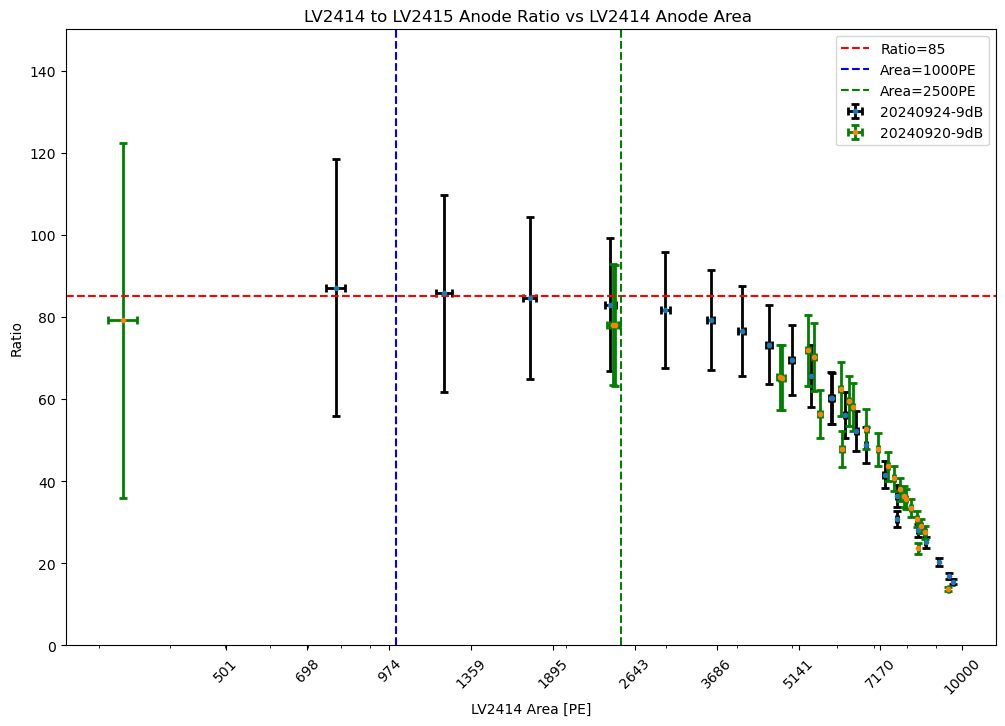

In [38]:
fig, ax = plt.subplots(figsize=(12,8))
ax.errorbar(df.Ch0_Area_mu, ratio, xerr=df.Ch0_Area_sigma, yerr=ratio_err, fmt='.', ecolor='black', capsize=3, elinewidth=2, capthick=2, label='20240924-9dB')
ax.errorbar(df0.Ch0_Area_mu, ratio_0, xerr=df0.Ch0_Area_sigma, yerr=ratio_err_0, fmt='.', ecolor='g', capsize=3, elinewidth=2, capthick=2, label='20240920-9dB')
ax.set_xlabel('LV2414 Area [PE]')
ax.set_ylabel('Ratio')
ax.set_title('LV2414 to LV2415 Anode Ratio vs LV2414 Anode Area ')
ax.set_xscale('log')
ax.axhline(y=85., color='r', linestyle='--', label='Ratio=85')
ax.axvline(x=1000, color='b', linestyle='--', label='Area=1000PE')
# ax.axvline(x=10000, color='b', linestyle='--', label='Area=10000PE')
ax.axvline(x=2500, color='g', linestyle='--', label='Area=2500PE')
ax.legend(loc='upper right')
ax.set_xticks(np.logspace(2.7, 4, 10))
ax.set_xticklabels(np.logspace(2.7, 4, 10).astype(int), rotation=45)
#ax.grid()
ax.set_ylim(0, 150)
#ax.set_xlim(0, 1000)
plt.savefig(r'./figs/LV2414_LV2415_anode_Ratio_use_Gaussian_fit_20240924_.png', bbox_inches='tight', dpi=300)
plt.show

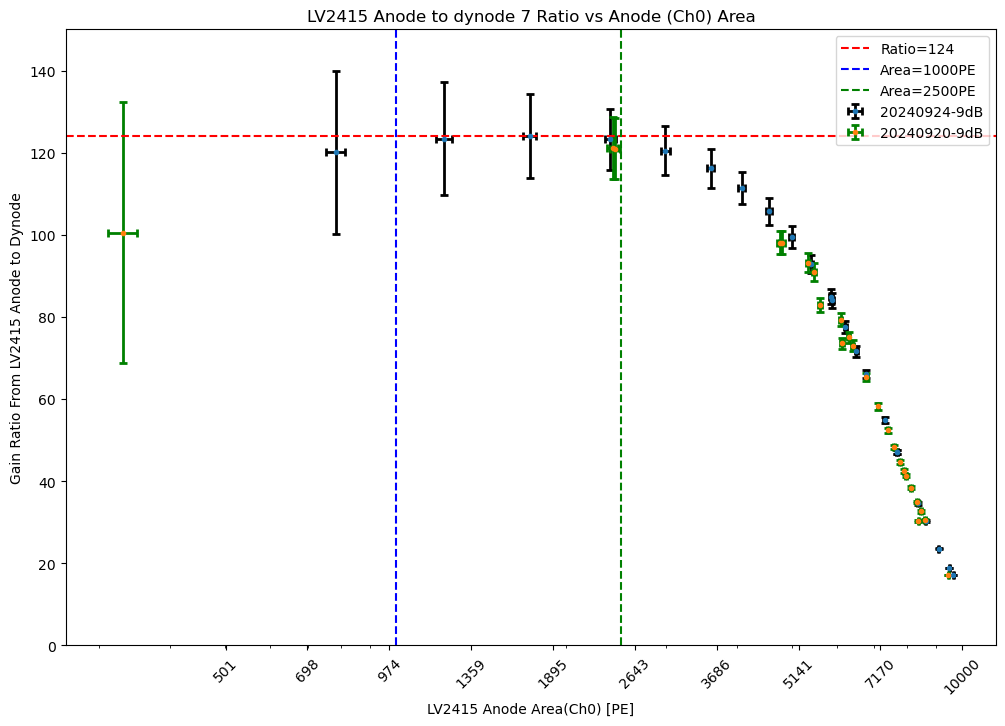

In [39]:
gain_ratio = df.Ch0_Area_mu / df.Ch2_Area_mu
gain_ratio_err = gain_ratio * np.sqrt((df.Ch0_Area_sigma/df.Ch0_Area_mu)**2 + (df.Ch2_Area_sigma/df.Ch2_Area_mu)**2)

gain_ratio_0 = df0.Ch0_Area_mu / df0.Ch2_Area_mu
gain_ratio_err_0 = gain_ratio_0 * np.sqrt((df0.Ch0_Area_sigma/df0.Ch0_Area_mu)**2 + (df0.Ch2_Area_sigma/df0.Ch2_Area_mu)**2)


fig, ax = plt.subplots(figsize=(12,8))
ax.errorbar(df.Ch0_Area_mu, gain_ratio, xerr=df.Ch0_Area_sigma, yerr=gain_ratio_err, fmt='.', ecolor='black', capsize=3, elinewidth=2, capthick=2, label='20240924-9dB')
ax.errorbar(df0.Ch0_Area_mu, gain_ratio_0, xerr=df0.Ch0_Area_sigma, yerr=gain_ratio_err_0, fmt='.', ecolor='g', capsize=3, elinewidth=2, capthick=2, label='20240920-9dB')
ax.set_xlabel('LV2415 Anode Area(Ch0) [PE]')
ax.set_ylabel('Gain Ratio From LV2415 Anode to Dynode')
ax.set_title('LV2415 Anode to dynode 7 Ratio vs Anode (Ch0) Area')
ax.set_xscale('log')
ax.axhline(y=124., color='r', linestyle='--', label='Ratio=124')
ax.axvline(x=1000, color='b', linestyle='--', label='Area=1000PE')
ax.axvline(x=2500, color='g', linestyle='--', label='Area=2500PE')
ax.legend(loc='upper right')
ax.set_xticks(np.logspace(2.7, 4, 10))
ax.set_xticklabels(np.logspace(2.7, 4, 10).astype(int), rotation=45)
# ax.grid()
ax.set_ylim(0, 150)
#ax.set_xlim(0, 1000)
plt.savefig(r'./figs/LV2414_Anode_to_Dynode_Gain_Ratio_20240924.png',  bbox_inches='tight',  dpi=300)
plt.show()

In [40]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
# from landaupy import landau
# from scipy.optimize import curve_fit

import analysis_data
import process_data
import pandas as pd
df_path = 'outnpy/df_100ns_900mv_20240924_backup.h5py'
df = pd.read_hdf(df_path, key='winfo')

In [41]:
df = df.eval('Gain_Ratio = Ch0_Area_mu / Ch2_Area_mu')
df.sort_values(by='Ch0_Area_mu')

,Ch0_Area_mu,Ch0_Area_sigma,Ch1_Area_mu,Ch1_Area_sigma,Ch2_Area_mu,Ch2_Area_sigma,Ratio_fit_mu,Ratio_fit_sigma,file_tag,Gain_Ratio
8,784.448286,31.079364,9.001924,3.215555,6.530890,1.045959,87.142293,31.318763,20240924_950mv_900mv_100ns_attenuator_9DB,120.113532
6,1216.805413,38.637041,14.196193,3.954167,9.859086,1.058253,85.713503,24.029028,20240924_965mv_900mv_100ns_attenuator_9DB,123.419699
7,1724.577599,45.655745,20.392685,4.720816,13.893644,1.082363,84.568442,19.704820,20240924_980mv_900mv_100ns_attenuator_9DB,124.127089
9,2391.849657,52.240849,28.820353,5.612226,19.405815,1.099492,82.991684,16.262418,20240924_1.000V_900mv_100ns_attenuator_9DB,123.254274
5,2991.136207,55.689459,36.610339,6.293250,24.826213,1.142458,81.701954,14.126553,20240924_1.010V_900mv_100ns_attenuator_9DB,120.482985
4,3597.306024,56.670779,45.397648,6.988979,30.966531,1.173257,79.239921,12.262710,20240924_1.020V_900mv_100ns_attenuator_9DB,116.167549
3,4082.233209,56.095315,53.324819,7.580448,36.649350,1.203854,76.554094,10.933355,20240924_1.030V_900mv_100ns_attenuator_9DB,111.386239
1,4558.733190,54.319974,62.234172,8.161690,43.141526,1.231217,73.251287,9.646099,20240924_1.040V_900mv_100ns_attenuator_9DB,105.669261
0,4996.692712,51.831023,71.831750,8.732552,50.218766,1.262149,69.561061,8.487233,20240924_1.050V_900mv_100ns_attenuator_9DB,99.498517
2,5409.963700,48.787700,82.514968,9.412742,58.293035,1.300190,65.563422,7.502361,20240924_1.060V_900mv_100ns_attenuator_9DB,92.806348


In [42]:
Ratio_of_filter = np.mean(df.Ratio_fit_mu[df.Ch0_Area_mu < 4000])
Ratio_of_filter_err =  np.std(df.Ratio_fit_mu[df.Ch0_Area_mu < 4000]) 
Gain_ratio_mu = np.mean(df.Gain_Ratio[df.Ch0_Area_mu < 4000])
Gain_ratio_err =  np.std(df.Gain_Ratio[df.Ch0_Area_mu < 4000]) 
Ratio_of_filter, Ratio_of_filter_err, Gain_ratio_mu, Gain_ratio_err

(83.55963261815212, 2.611696693187247, 121.26085465658046, 2.729860386508014)

In [43]:
dynode_fix = df.Ch2_Area_mu * Gain_ratio_mu
dynode_fix_err = dynode_fix * np.sqrt((df.Ch2_Area_sigma/df.Ch2_Area_mu)**2 + (Gain_ratio_err/Gain_ratio_mu)**2)
filter_fix = df.Ch1_Area_mu * Ratio_of_filter
filter_fix_err = filter_fix * np.sqrt((df.Ch1_Area_sigma/df.Ch1_Area_mu)**2 + (Ratio_of_filter_err/Ratio_of_filter)**2)

In [44]:
df['dynode_fix'] = dynode_fix
df['dynode_fix_err'] = dynode_fix_err
df['filter_fix'] = filter_fix
df['filter_fix_err'] = filter_fix_err

In [6]:
df.head()

,Ch0_Area_mu,Ch0_Area_sigma,Ch1_Area_mu,Ch1_Area_sigma,Ch2_Area_mu,Ch2_Area_sigma,Ratio_fit_mu,Ratio_fit_sigma,file_tag,Gain_Ratio,dynode_fix,dynode_fix_err,filter_fix,filter_fix_err
0,4996.692712,51.831023,71.831750,8.732552,50.218766,1.262149,69.561061,8.487233,20240924_1.050V_900mv_100ns_attenuator_9DB,99.498517,6089.570477,205.469749,6002.234638,753.419240
1,4558.733190,54.319974,62.234172,8.161690,43.141526,1.231217,73.251287,9.646099,20240924_1.040V_900mv_100ns_attenuator_9DB,105.669261,5231.378313,190.157504,5200.264566,701.088900
2,5409.963700,48.787700,82.514968,9.412742,58.293035,1.300190,65.563422,7.502361,20240924_1.060V_900mv_100ns_attenuator_9DB,92.806348,7068.663232,224.009617,6894.920423,815.514580
3,4082.233209,56.095315,53.324819,7.580448,36.649350,1.203854,76.554094,10.933355,20240924_1.030V_900mv_100ns_attenuator_9DB,111.386239,4444.131445,176.973987,4455.802276,648.549002
4,3597.306024,56.670779,45.397648,6.988979,30.966531,1.173257,79.239921,12.262710,20240924_1.020V_900mv_100ns_attenuator_9DB,116.167549,3755.028038,165.489733,3793.410785,595.910742


In [8]:
# for index, row in df.iterrows():
#     tmp1 =(row.Ch2_Area_sigma/row.Ch2_Area_mu)**2
#     tmp2 = (row.Ch1_Area_sigma/row.Ch1_Area_mu)**2
#     dynode_fix_err.append( row.dynode_fix * np.sqrt( tmp1**2 + (Gain_ratio_err/Gain_ratio_mu)**2) )
#     filter_fix_err.append( row.filter_fix * np.sqrt( tmp2**2+ (Ratio_of_filter_err/Ratio_of_filter)**2) )

In [45]:
yerr_dynode_fix = df.Ch0_Area_mu/df.dynode_fix *np.sqrt(df.Ch0_Area_sigma**2/df.Ch0_Area_mu**2 + df.dynode_fix_err**2/df.dynode_fix**2)
yerr_filter_fix = df.Ch0_Area_mu/df.filter_fix *np.sqrt(df.Ch0_Area_sigma**2/df.Ch0_Area_mu**2 + df.filter_fix_err**2/df.filter_fix**2)
df['yerr_dynode_fix'] = yerr_dynode_fix
df['yerr_filter_fix'] = yerr_filter_fix

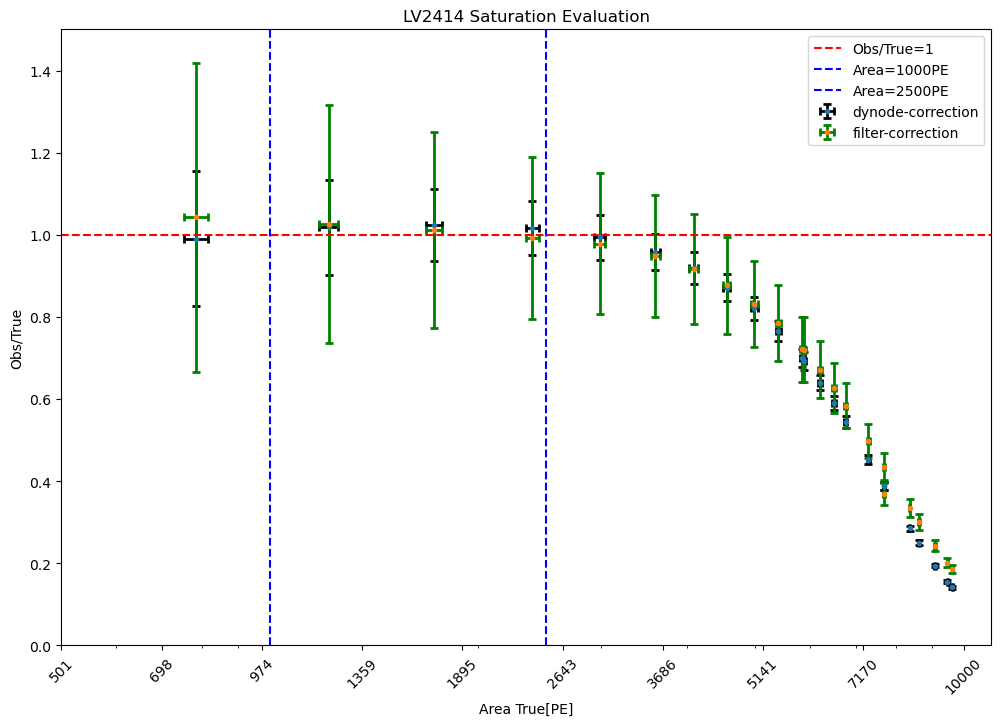

In [46]:

fig, ax = plt.subplots(figsize=(12,8))
ax.errorbar(df.Ch0_Area_mu, df.Ch0_Area_mu/df.dynode_fix, xerr=df.Ch0_Area_sigma, yerr=yerr_dynode_fix, fmt='.', ecolor='black', capsize=3, elinewidth=2, capthick=2, label='dynode-correction')
ax.errorbar(df.Ch0_Area_mu , df.Ch0_Area_mu/df.filter_fix, xerr=df.Ch0_Area_sigma, yerr=yerr_filter_fix, fmt='.', ecolor='g', capsize=3, elinewidth=2, capthick=2, label='filter-correction')
ax.set_xlabel('Area True[PE]')
ax.set_ylabel('Obs/True')
ax.set_title('')
ax.set_xscale('log')
ax.axhline(y=1., color='r', linestyle='--', label='Obs/True=1')
ax.axvline(x=1000, color='b', linestyle='--', label='Area=1000PE')
ax.axvline(x=2500, color='b', linestyle='--', label='Area=2500PE')
ax.legend(loc='upper right')
ax.set_xticks(np.logspace(2.7, 4, 10))
ax.set_xticklabels(np.logspace(2.7, 4, 10).astype(int), rotation=45)
# ax.grid()
ax.set_ylim(0, 1.5)
#ax.set_xlim(0, 1000)
ax.set_title('LV2414 Saturation Evaluation')
plt.savefig(r'./figs/LV2414_saturation_eval_20240924.png',  bbox_inches='tight',  dpi=300)
plt.show()

In [47]:
df.head()

,Ch0_Area_mu,Ch0_Area_sigma,Ch1_Area_mu,Ch1_Area_sigma,Ch2_Area_mu,Ch2_Area_sigma,Ratio_fit_mu,Ratio_fit_sigma,file_tag,Gain_Ratio,dynode_fix,dynode_fix_err,filter_fix,filter_fix_err,yerr_dynode_fix,yerr_filter_fix
0,4996.692712,51.831023,71.831750,8.732552,50.218766,1.262149,69.561061,8.487233,20240924_1.050V_900mv_100ns_attenuator_9DB,99.498517,6089.570477,205.469749,6002.234638,753.419240,0.028965,0.104851
1,4558.733190,54.319974,62.234172,8.161690,43.141526,1.231217,73.251287,9.646099,20240924_1.040V_900mv_100ns_attenuator_9DB,105.669261,5231.378313,190.157504,5200.264566,701.088900,0.033334,0.118647
2,5409.963700,48.787700,82.514968,9.412742,58.293035,1.300190,65.563422,7.502361,20240924_1.060V_900mv_100ns_attenuator_9DB,92.806348,7068.663232,224.009617,6894.920423,815.514580,0.025217,0.093074
3,4082.233209,56.095315,53.324819,7.580448,36.649350,1.203854,76.554094,10.933355,20240924_1.030V_900mv_100ns_attenuator_9DB,111.386239,4444.131445,176.973987,4455.802276,648.549002,0.038696,0.133942
4,3597.306024,56.670779,45.397648,6.988979,30.966531,1.173257,79.239921,12.262710,20240924_1.020V_900mv_100ns_attenuator_9DB,116.167549,3755.028038,165.489733,3793.410785,595.910742,0.044837,0.149717


In [48]:
# path = 'outnpy/df_fixed_area_vs_dynode_filter_20240924.h5py'
# process_data.write_to_hdf5(df, path)

h5 Write Time: 0.01 s 
h5 File Size: 1.03 MB
Save to outnpy/df_fixed_area_vs_dynode_filter_20240924.h5py


(0.013743400573730469, 1077099)